# Zomato Data Analysis Project

# Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:
• Restaurant Id: Unique id of every restaurant across various cities of the world
• Restaurant Name: Name of the restaurant
• Country Code: Country in which restaurant is located
• City: City in which restaurant is located
• Address: Address of the restaurant
• Locality: Location in the city
• Locality Verbose: Detailed description of the locality
• Longitude: Longitude coordinate of the restaurant&#39;s location
• Latitude: Latitude coordinate of the restaurant&#39;s location
• Cuisines: Cuisines offered by the restaurant
• Average Cost for two: Cost for two people in different currencies ��
• Currency: Currency of the country
• Has Table booking: yes/no
• Has Online delivery: yes/ no
• Is delivering: yes/ no
• Switch to order menu: yes/no
• Price range: range of price of food
• Aggregate Rating: Average rating out of 5
• Rating color: depending upon the average rating color
• Rating text: text on the basis of rating of rating
• Votes: Number of ratings casted by people

Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range


Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets


Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx
•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [89]:
# Try reading the CSV file with different encodings
encodings = ['latin1']

for encoding in encodings:
    try:
        df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding=encoding)
        print("File successfully loaded with encoding:", encoding)
        break
    except UnicodeDecodeError:
        print("Failed to read with encoding:", encoding)

File successfully loaded with encoding: latin1


In [90]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [34]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [35]:
df.tail(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,ÛÁstanbul,"CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...",Moda,"Moda, ÛÁstanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [36]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [37]:
df.shape

(9551, 21)

In [38]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [40]:
df.value_counts()

Restaurant ID  Restaurant Name     Country Code  City       Address                                                              Locality                   Locality Verbose                      Longitude  Latitude   Cuisines                                  Average Cost for two  Currency            Has Table booking  Has Online delivery  Is delivering now  Switch to order menu  Price range  Aggregate rating  Rating color  Rating text  Votes
53             Amber               1             New Delhi  N-19, Connaught Place, New Delhi                                     Connaught Place            Connaught Place, New Delhi            77.220891  28.630197  North Indian, Chinese, Mughlai            1800                  Indian Rupees(Rs.)  Yes                Yes                  No                 No                    3            2.6               Orange        Average      152      1
18264996       Kream's             1             New Delhi  Shop 6, D-121, Vikaspuri, New Delhi          

# Separating Categorical and Numerical columns

In [41]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns

# Create new DataFrames for categorical and numerical features
categorical_df = df[categorical_columns]
numerical_df = df[numerical_columns]

# Display the list of categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

# Display the first few rows of the categorical and numerical DataFrames
print("\nCategorical DataFrame:")
print(categorical_df.head())

print("\nNumerical DataFrame:")
print(numerical_df.head())


Categorical Columns:
Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')

Numerical Columns:
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

Categorical DataFrame:
          Restaurant Name              City  \
0        Le Petit Souffle       Makati City   
1        Izakaya Kikufuji       Makati City   
2  Heat - Edsa Shangri-La  Mandaluyong City   
3                    Ooma  Mandaluyong City   
4             Sambo Kojin  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   


# Check for missing values

In [42]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

<Axes: >

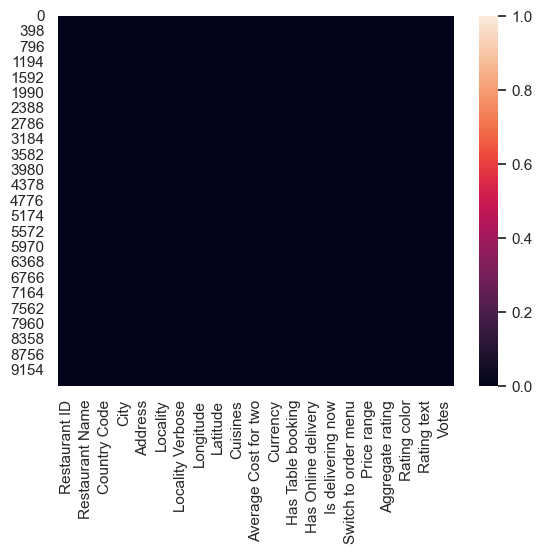

In [43]:
sns.heatmap(df.isnull())

# there are no missing values in the dataset

# Statistical Analysis

In [44]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


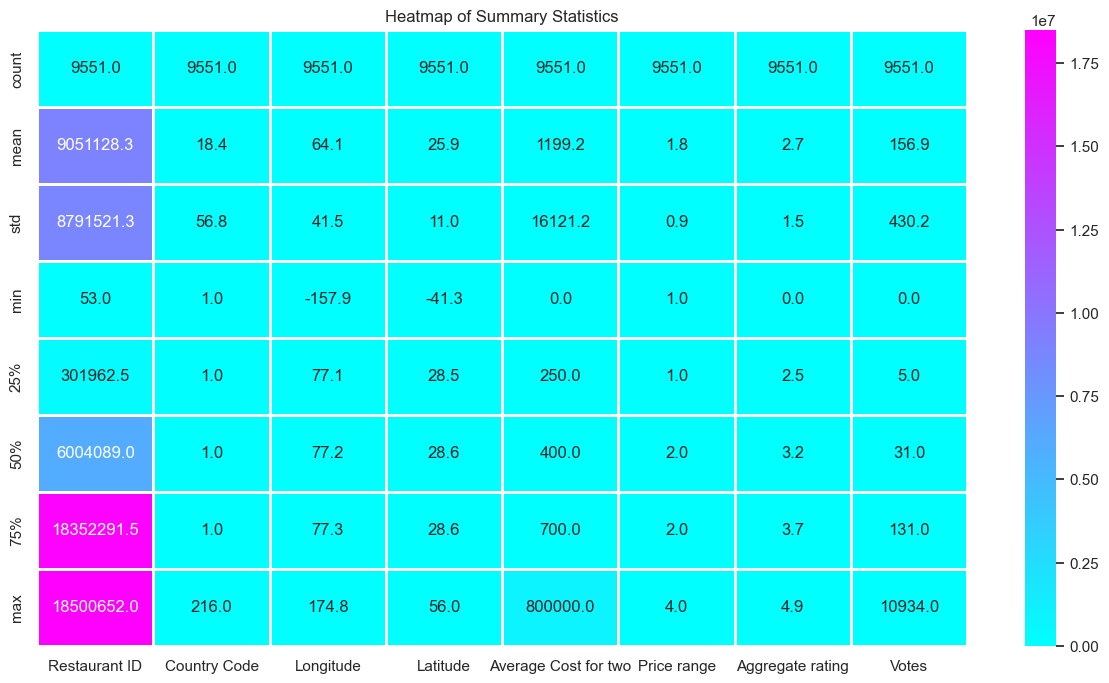

In [45]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.describe(), annot=True, cmap='cool', fmt=".1f", linewidths=1.8)
plt.title('Heatmap of Summary Statistics')
plt.show()

In [46]:
# Separate numeric and categorical columns
numeric_columns = []
categorical_columns = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

# Print the lists of numeric and categorical columns
print("Numeric Columns:")
print(numeric_columns)
print("\nCategorical Columns:")
print(categorical_columns)


Numeric Columns:
['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

Categorical Columns:
['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [47]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for '{column}':")
    print(value_counts)
    print("\n")

Value counts for 'Restaurant ID':
6317637     1
18254520    1
18462589    1
18336474    1
18336477    1
           ..
313059      1
763         1
7557        1
525         1
5927402     1
Name: Restaurant ID, Length: 9551, dtype: int64


Value counts for 'Restaurant Name':
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7446, dtype: int64


Value counts for 'Country Code':
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


Value counts for 'City':
New Delhi           5473
Gurgaon             1118
Noida     

<Axes: xlabel='Price range', ylabel='count'>

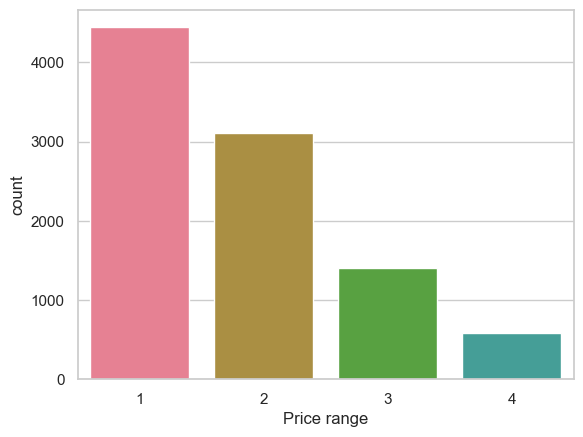

In [48]:
sns.countplot(x='Price range',data=df)


<Axes: xlabel='count', ylabel='Currency'>

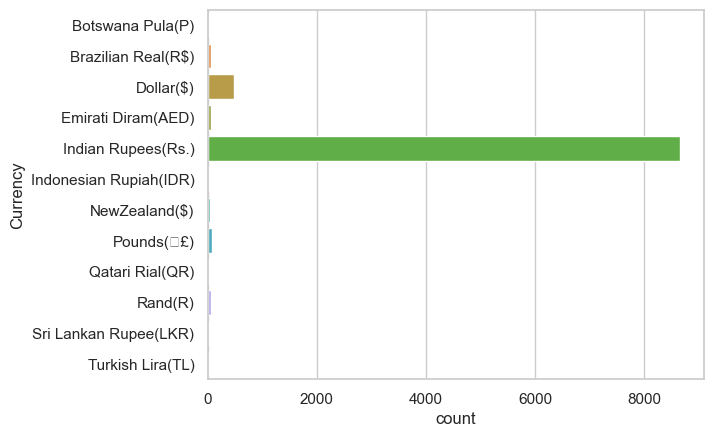

In [98]:
sns.countplot(y='Currency',data=df)


<Axes: xlabel='Is delivering now', ylabel='count'>

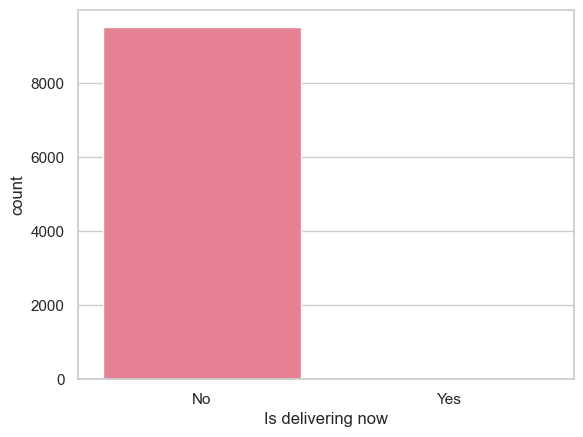

In [50]:
sns.countplot(x='Is delivering now',data=df)


<Axes: xlabel='Has Table booking', ylabel='count'>

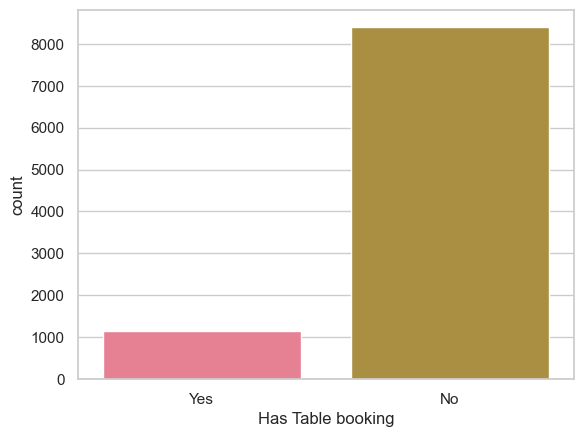

In [51]:
sns.countplot(x='Has Table booking',data=df)


<Axes: xlabel='Has Online delivery', ylabel='count'>

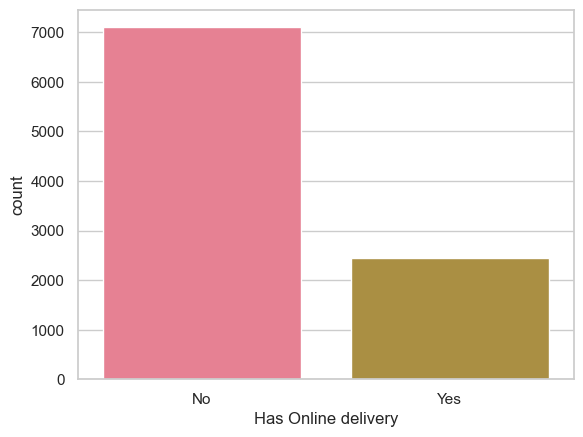

In [52]:
sns.countplot(x='Has Online delivery',data=df)


<Axes: xlabel='Restaurant ID', ylabel='count'>

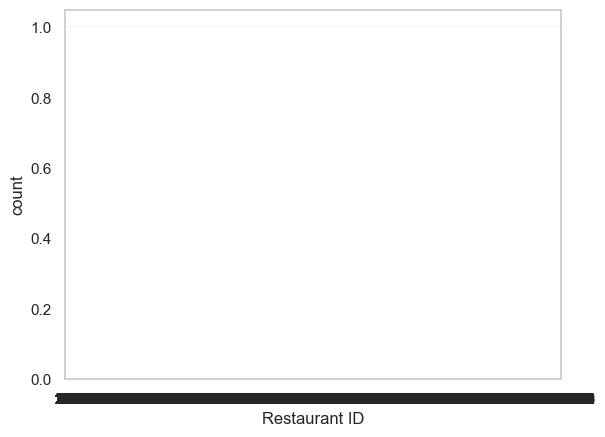

In [53]:
sns.countplot(x='Restaurant ID',data=df)


<Axes: xlabel='Country Code', ylabel='count'>

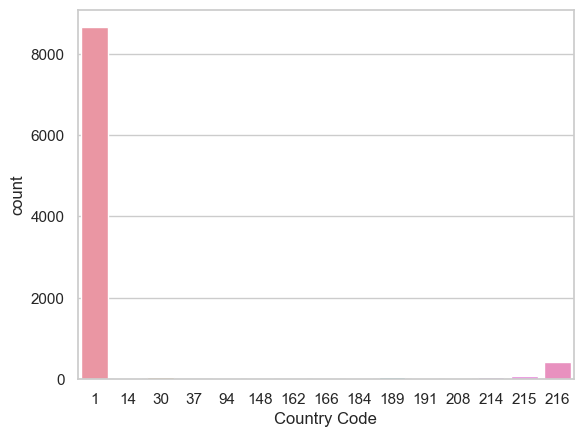

In [54]:
sns.countplot(x='Country Code',data=df)


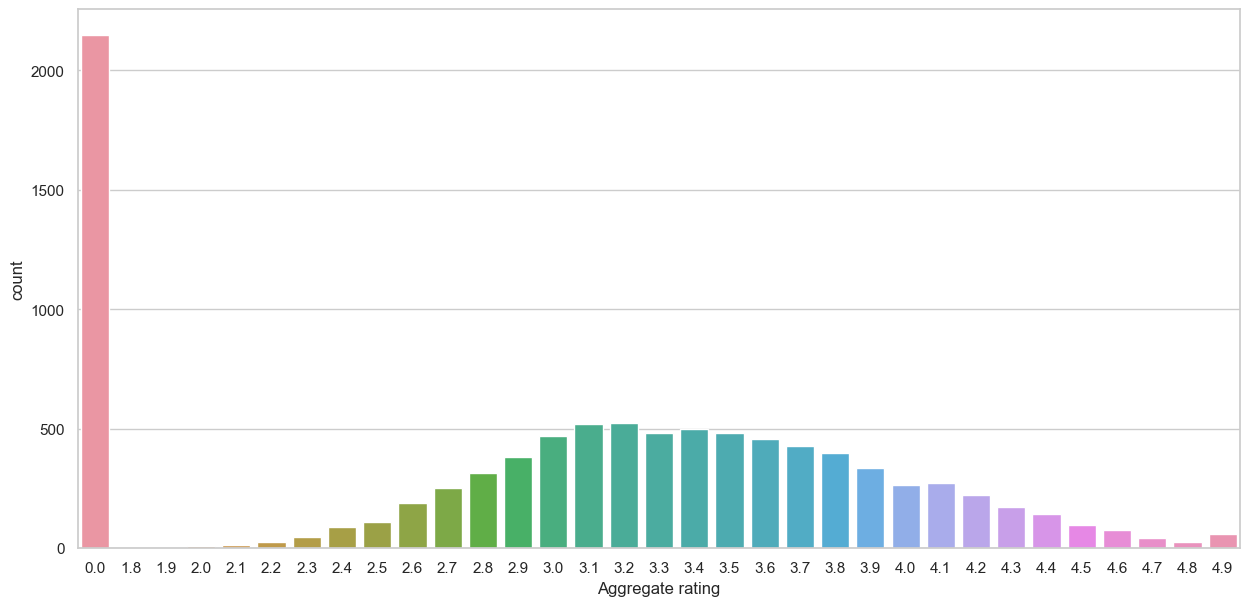

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(x='Aggregate rating',data=df)
plt.show()

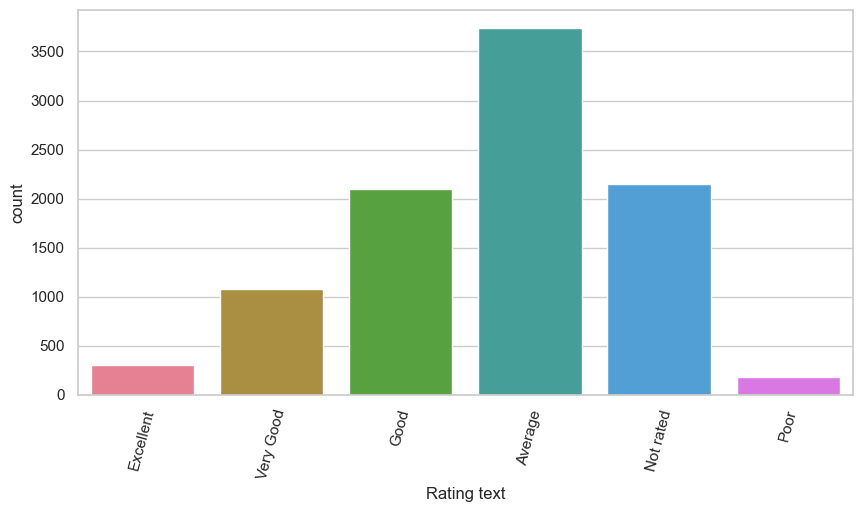

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='Rating text',data=df)
plt.xticks(rotation=75)
plt.show()

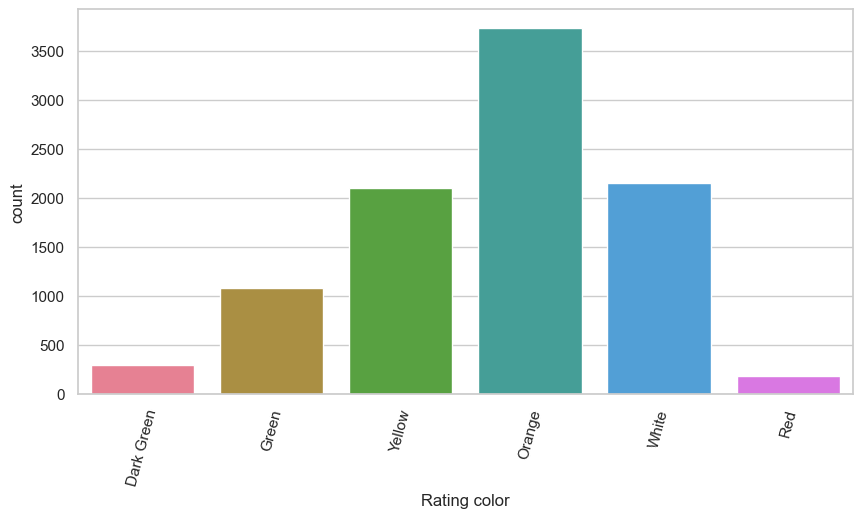

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x='Rating color',data=df)
plt.xticks(rotation=75)
plt.show()

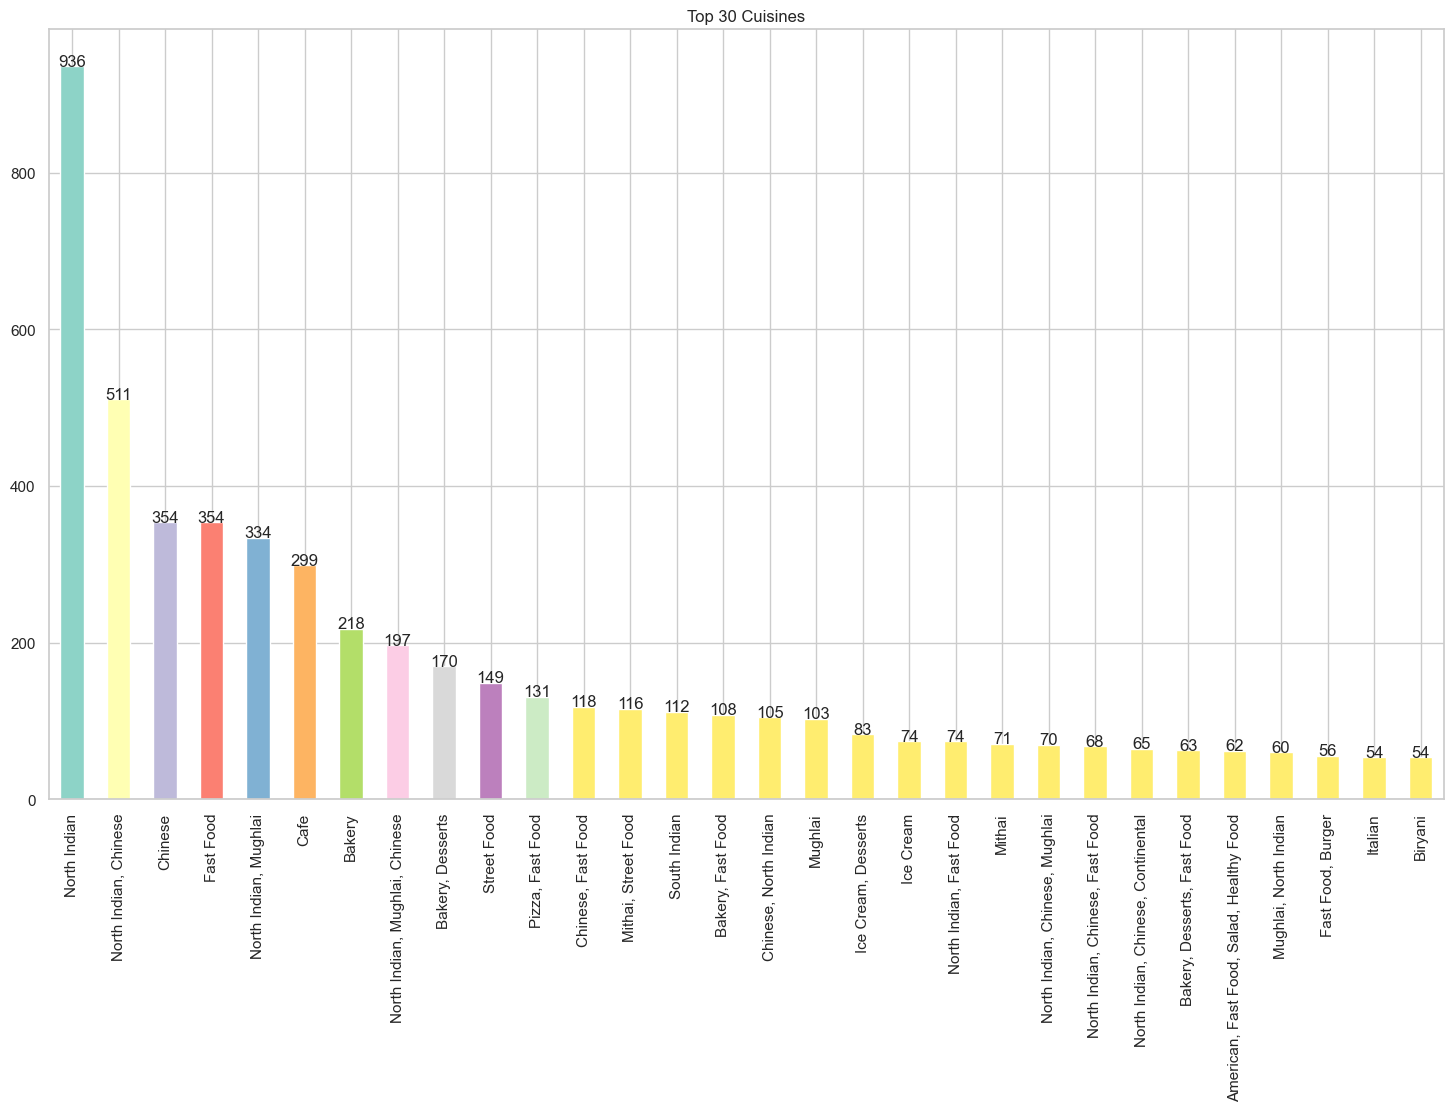

In [111]:
cuisine_counts = df['Cuisines'].value_counts()

# Select the top 30 cuisines
top_30_cuisines = cuisine_counts.head(30)

# Create a color map
cmap = plt.get_cmap('Set3')
colors = cmap(np.arange(len(top_30_cuisines)))

# Create the bar plot
ax = top_30_cuisines.plot(kind='bar', figsize=(18, 10), title='Top 30 Cuisines', color=colors)

# Annotate the bars with their counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(int(i.get_height())), ha='center')

# Show the plot
plt.show()


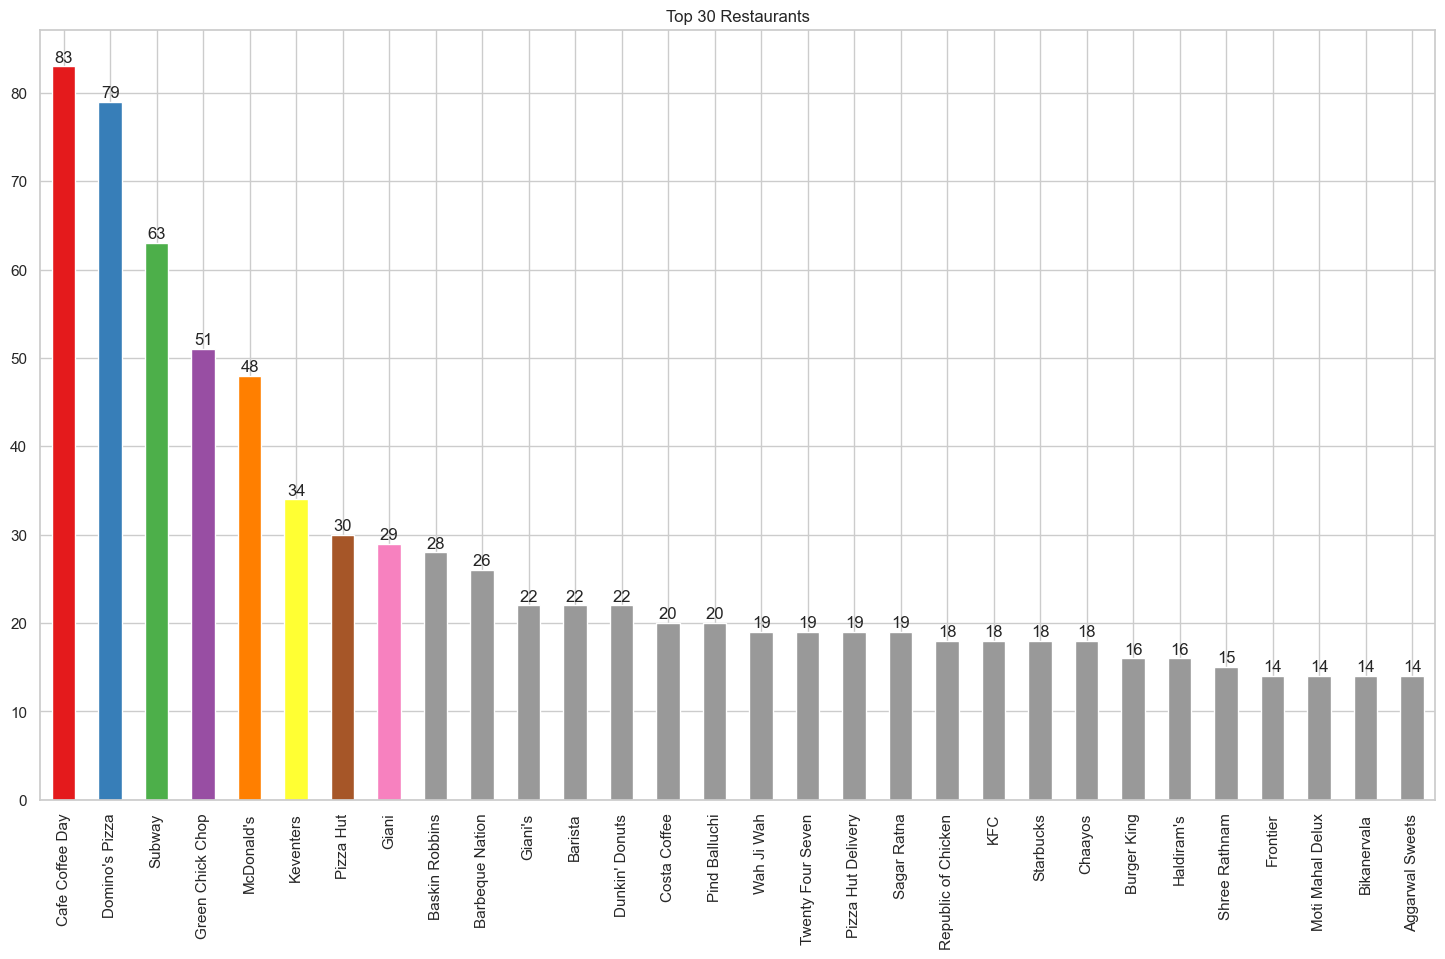

In [115]:
restaurant_counts = df['Restaurant Name'].value_counts()

# Select the top 30 restaurant names
top_30_restaurants = restaurant_counts.head(30)

# Create a color map
cmap = plt.get_cmap('Set1')
colors = cmap(np.arange(len(top_30_restaurants)))

# Create the bar plot
ax = top_30_restaurants.plot(kind='bar', figsize=(18, 10), title='Top 30 Restaurants', color=colors)

# Annotate the bars with their counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(int(i.get_height())), ha='center')

# Show the plot
plt.show()


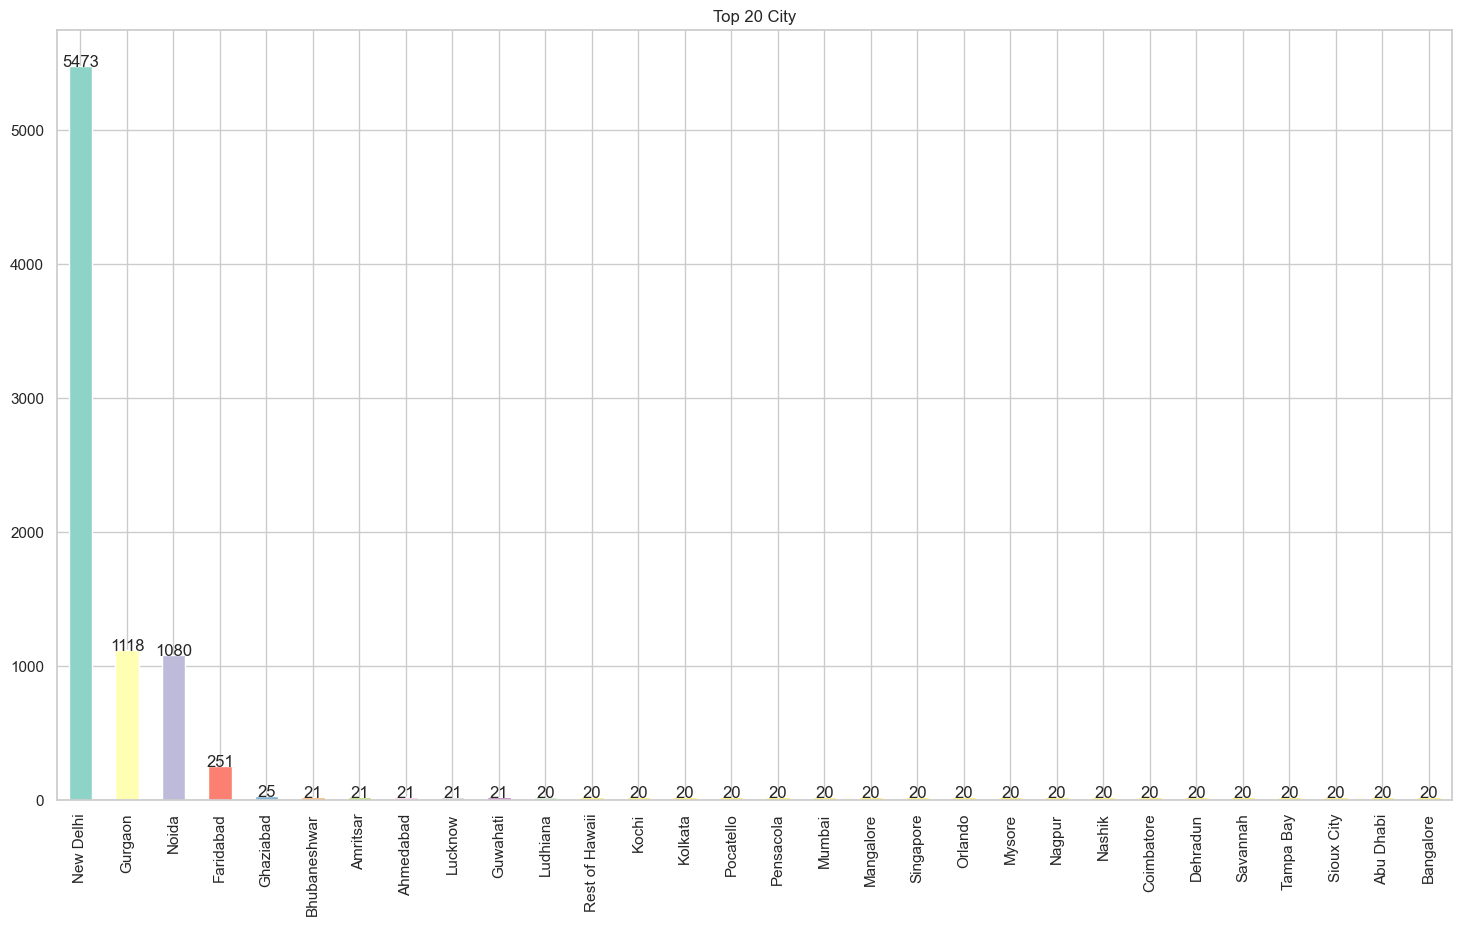

In [119]:
City_counts = df['City'].value_counts()

# Select the top 30 cuisines
top_20_City = City_counts.head(30)

# Create a color map
cmap = plt.get_cmap('Set3')
colors = cmap(np.arange(len(top_30_cuisines)))

# Create the bar plot
ax = top_20_City.plot(kind='bar', figsize=(18, 10), title='Top 20 City', color=colors)

# Annotate the bars with their counts
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, str(int(i.get_height())), ha='center')

# Show the plot
plt.show()

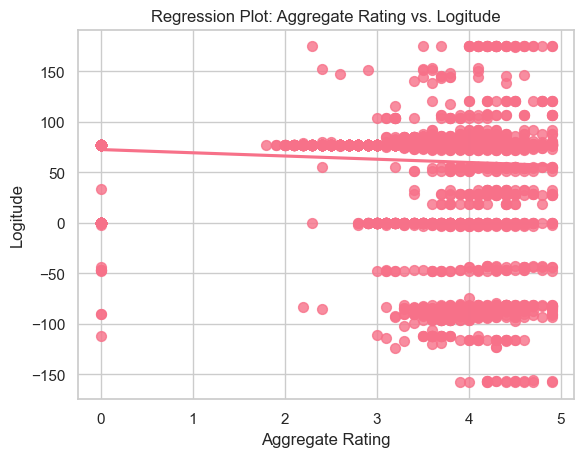

In [56]:
# Filter the data and select relevant columns
selected_data = df[['Aggregate rating', 'Longitude']].dropna()

# Create a regplot
sns.regplot(x='Aggregate rating', y='Longitude', data=selected_data, scatter_kws={"s": 50}, ci=None)

# Add labels and title
plt.xlabel("Aggregate Rating")
plt.ylabel("Logitude")
plt.title("Regression Plot: Aggregate Rating vs. Logitude")

# Display the plot
plt.show()


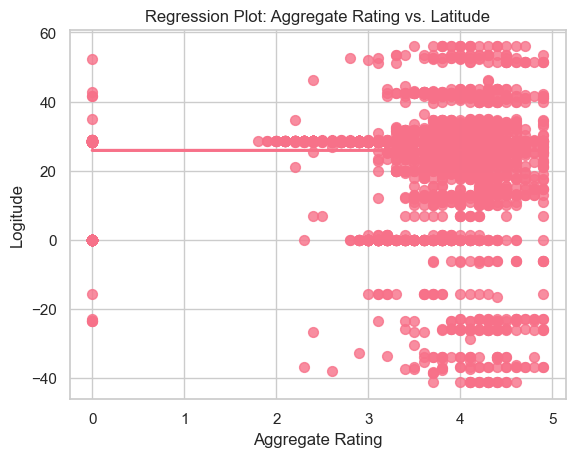

In [91]:
# Filter the data and select relevant columns
selected_data = df[['Aggregate rating', 'Latitude']].dropna()

# Create a regplot
sns.regplot(x='Aggregate rating', y='Latitude', data=selected_data, scatter_kws={"s": 50}, ci=None)

# Add labels and title
plt.xlabel("Aggregate Rating")
plt.ylabel("Logitude")
plt.title("Regression Plot: Aggregate Rating vs. Latitude")

# Display the plot
plt.show()

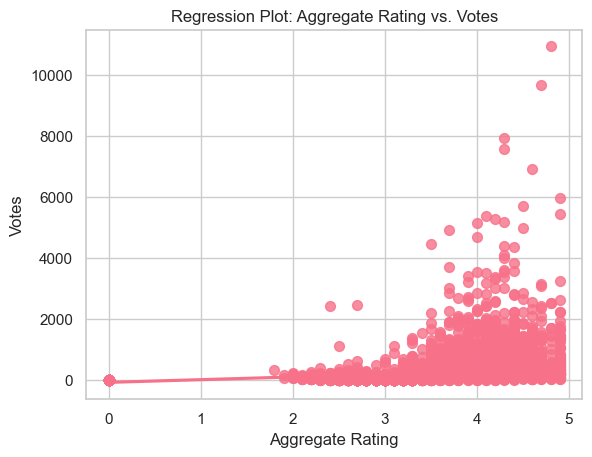

In [57]:
# Filter the data and select relevant columns
selected_data = df[['Aggregate rating', 'Votes']].dropna()

# Create a regplot
sns.regplot(x='Aggregate rating', y='Votes', data=selected_data, scatter_kws={"s": 50}, ci=None)

# Add labels and title
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.title("Regression Plot: Aggregate Rating vs. Votes")

# Display the plot
plt.show()


<Axes: xlabel='Aggregate rating', ylabel='Average Cost for two'>

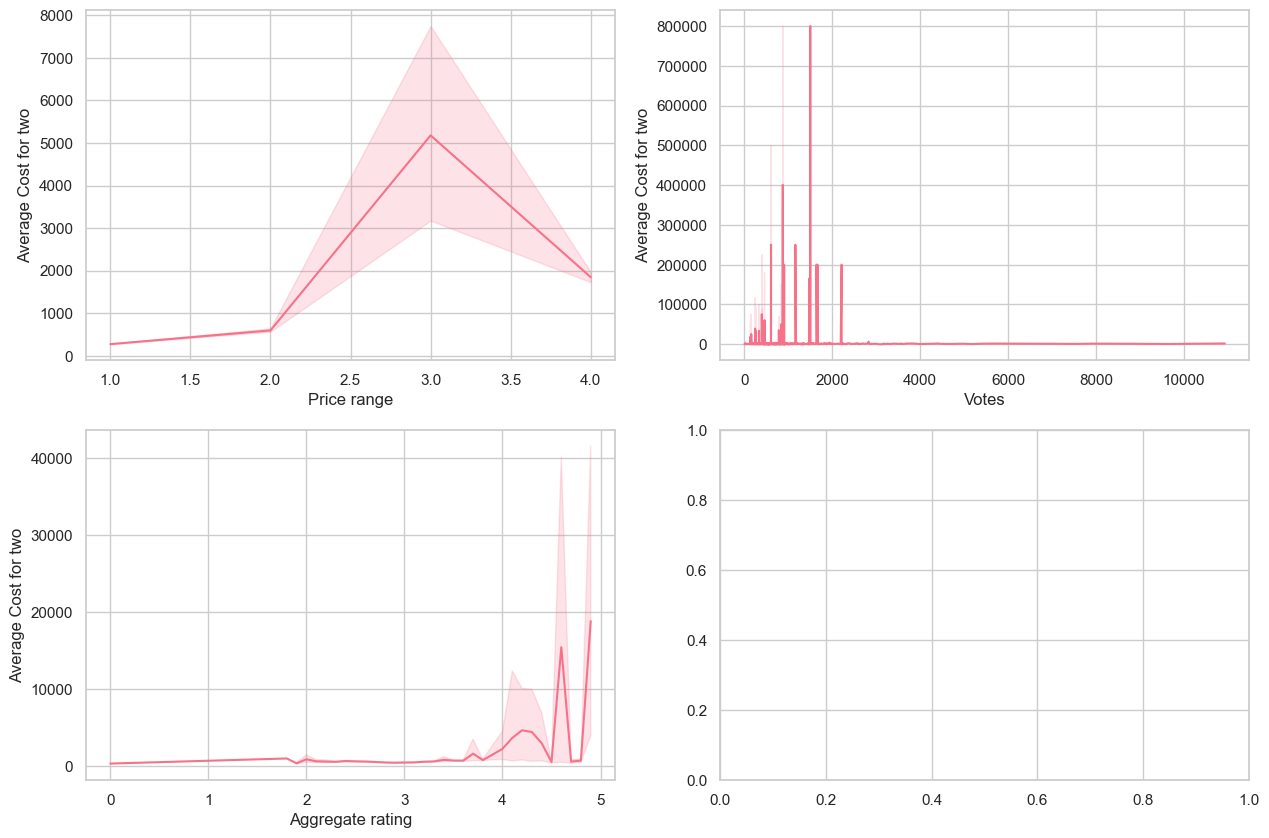

In [105]:
fig,axes=plt.subplots(2,2,figsize=(15,10))

#checking the relation between Evaporation and RainTomorrow
sns.lineplot(x='Price range',y='Average Cost for two',ax=axes[0,0],palette="OrRd",data=df)

#checking the relation between Sunshine and RainTomorrow
sns.lineplot(x='Votes',y='Average Cost for two',ax=axes[0,1],palette="OrRd",data=df)

#checking the relation between Evaporation and Rainfall
sns.lineplot(x='Aggregate rating',y='Average Cost for two',ax=axes[1,0],palette="OrRd",data=df)

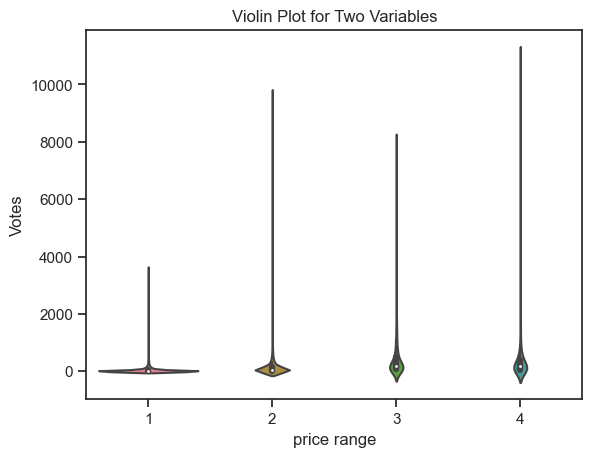

In [124]:
# Create a violin plot
sns.violinplot(x='Price range', y='Votes', data=df)

# Add labels and a title
plt.xlabel('price range')
plt.ylabel('Votes')
plt.title('Violin Plot for Two Variables')

# Show the plot
plt.show()


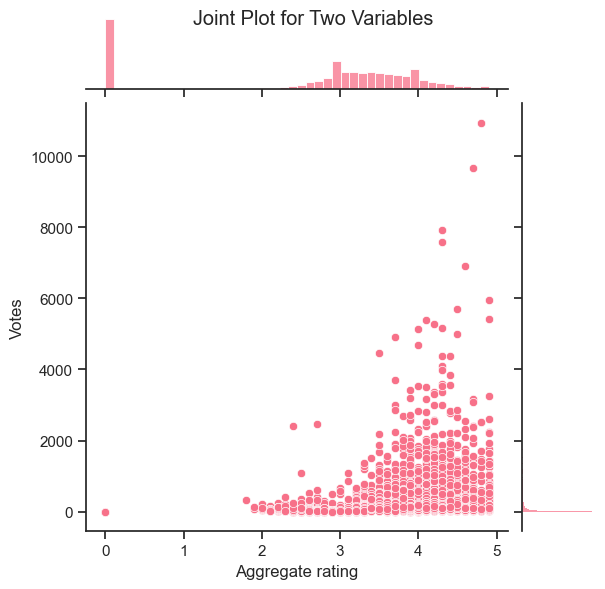

In [132]:
# Create a joint plot
sns.jointplot(x='Aggregate rating', y='Votes', data=df, kind='scatter')  # You can change 'kind' to 'reg', 'kde', or 'hist' for different visualization styles

# Add a title
plt.suptitle('Joint Plot for Two Variables')

# Show the plot
plt.show()



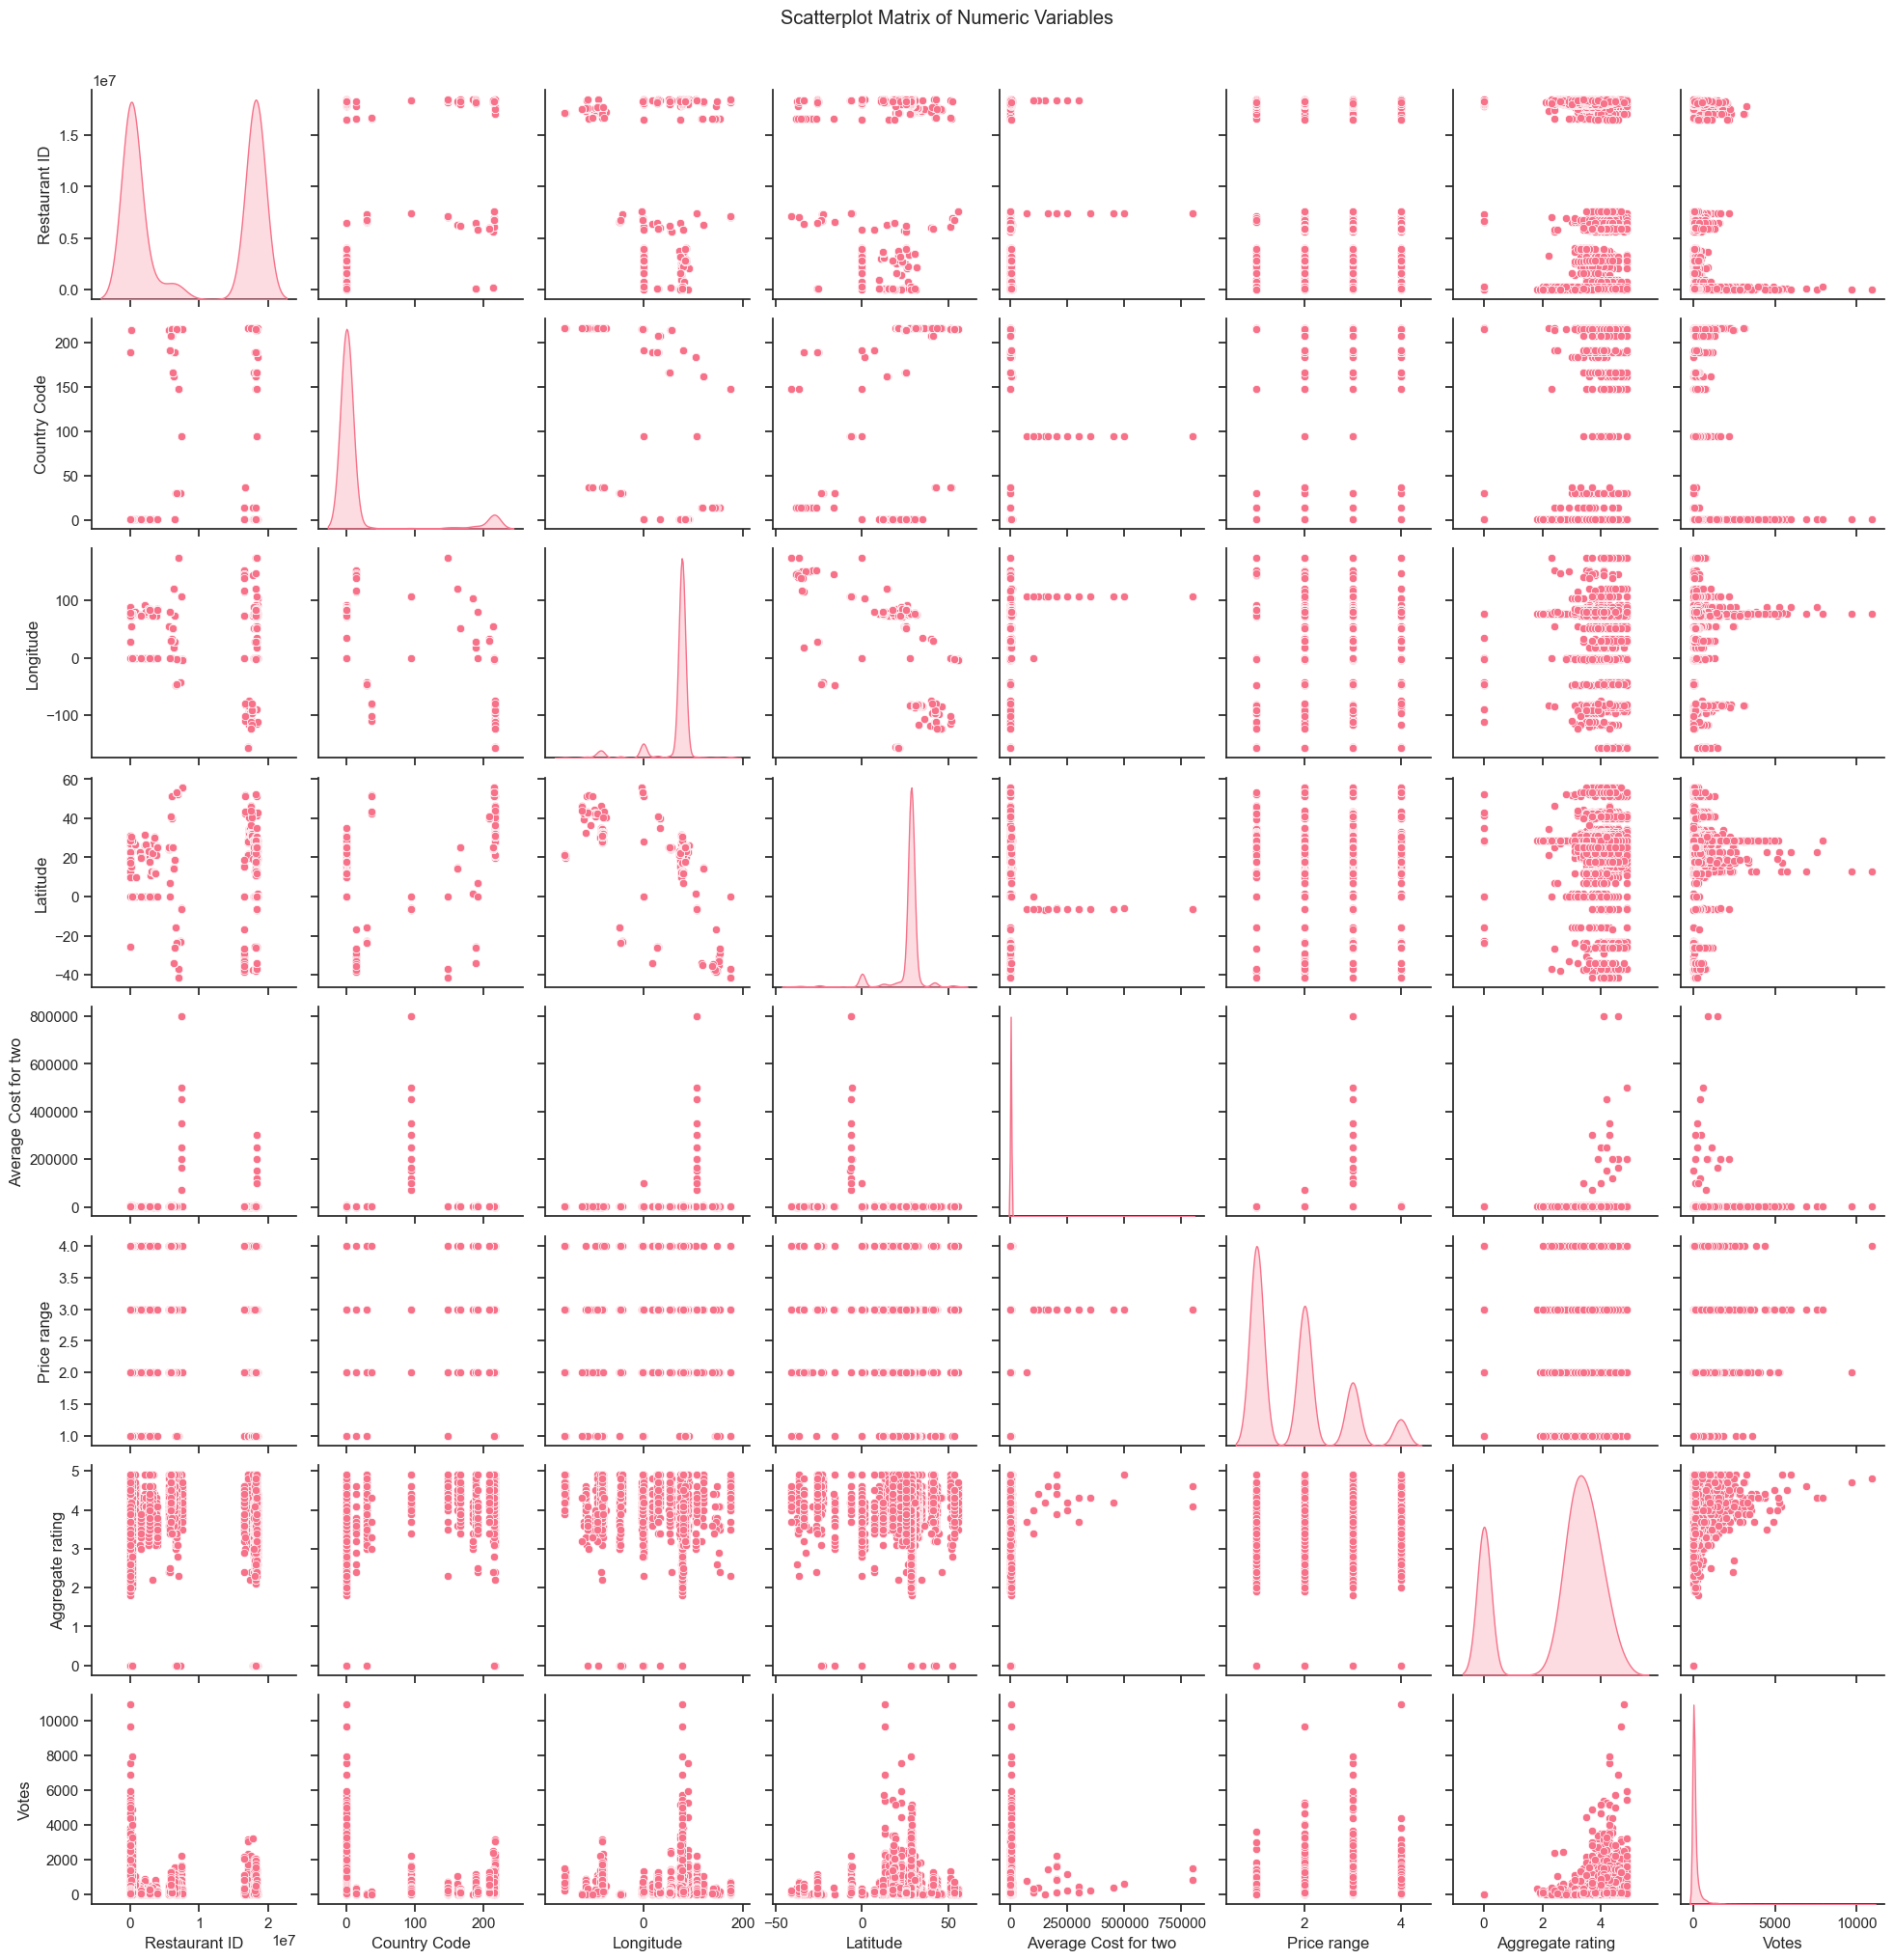

In [133]:
# Select relevant numeric columns for the scatterplot matrix
numeric_columns = ['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']

# Create a scatterplot matrix
sns.set(style="ticks")
sns.set_palette("husl")
sns.pairplot(df[numeric_columns], diag_kind='kde', markers='o')

# Add title
plt.suptitle("Scatterplot Matrix of Numeric Variables", y=1.02)

# Display the plot
plt.show()


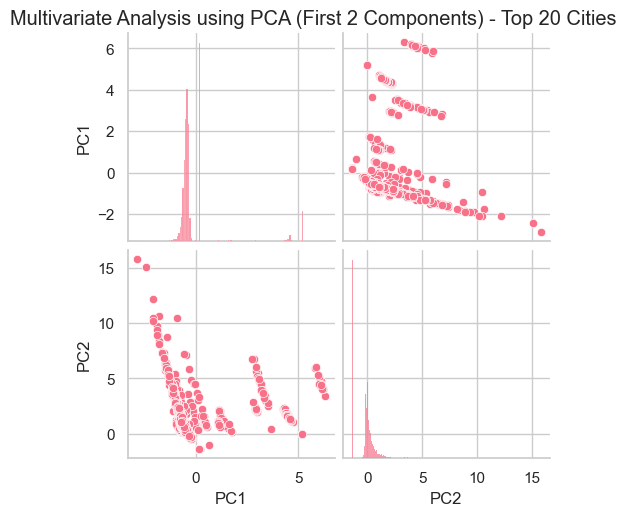

In [134]:
# Filter the data for the top 20 cities 
top_20_cities = df['City'].value_counts().head(20).index
filtered_df = df[df['City'].isin(top_20_cities)]

# Select relevant numeric columns for the multivariate analysis
numeric_columns = ['Aggregate rating', 'Votes', 'Longitude', 'Latitude']

# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_df[numeric_columns])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Scatterplot matrix of the first two PCA components
sns.set_style("whitegrid")
sns.pairplot(pca_df)  # No 'hue' parameter

# Add title
plt.suptitle("Multivariate Analysis using PCA (First 2 Components) - Top 20 Cities", y=1.02)

# Display the plot
plt.show()



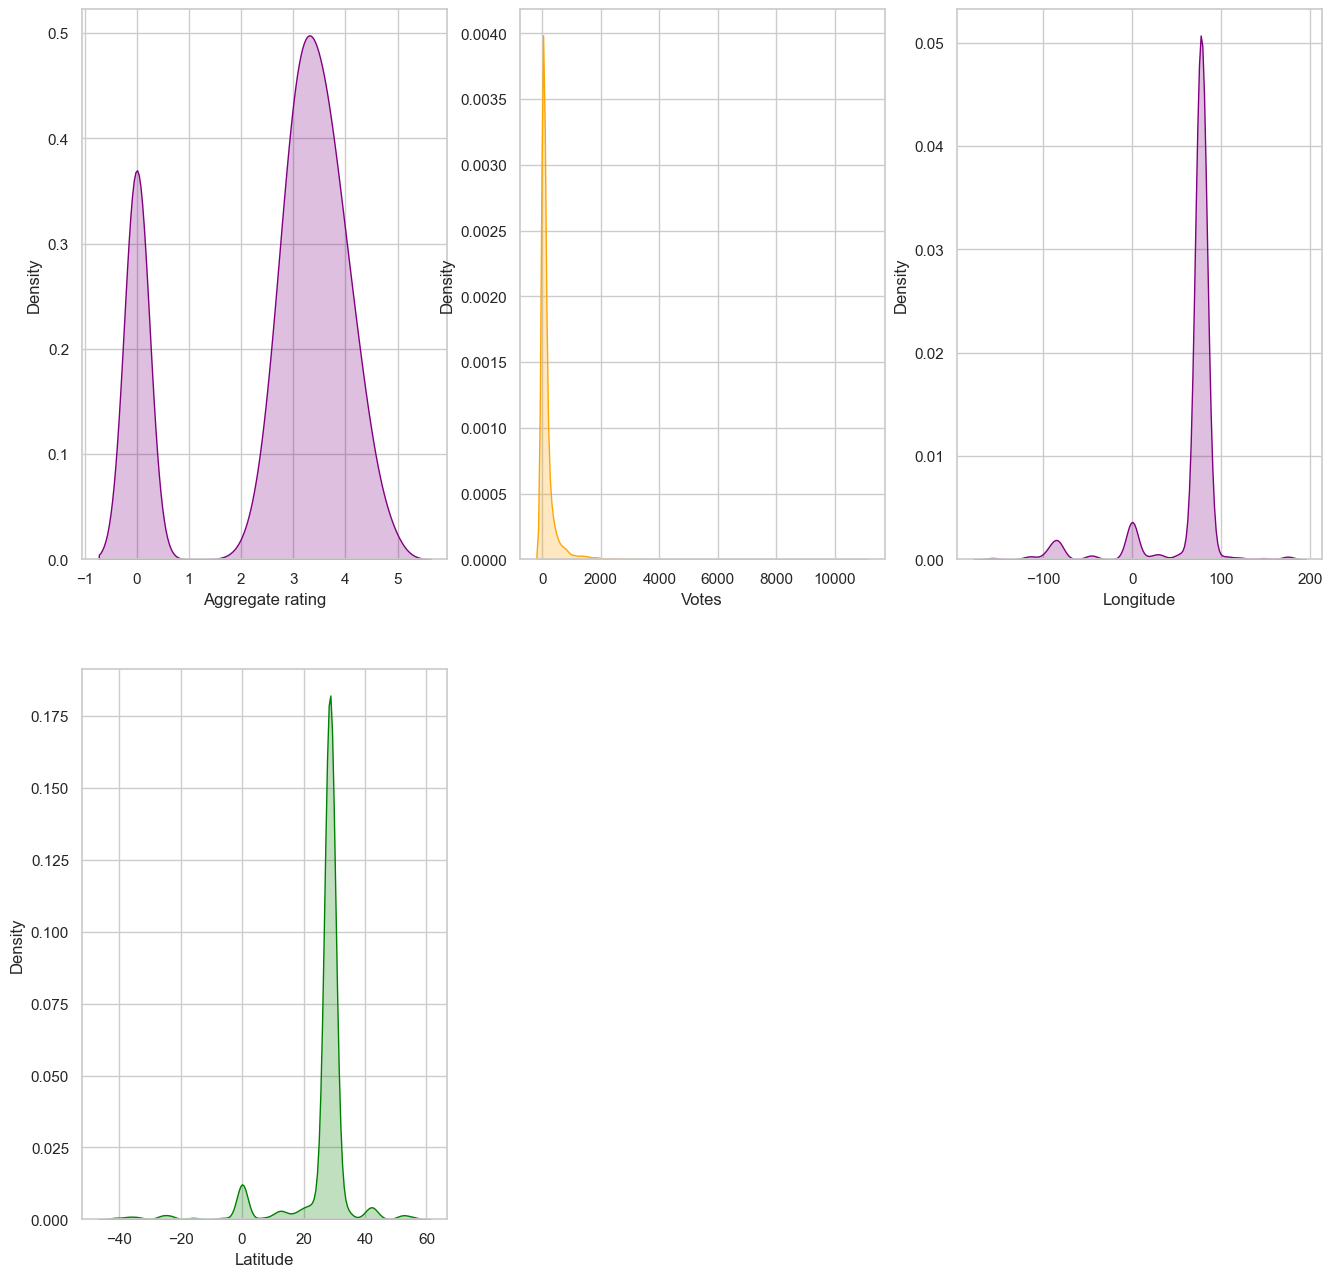

In [61]:
import random  # Import the random module

plt.figure(figsize=(16, 50))

# Define colors and palettes
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']
palettes = ['Set1', 'Set2', 'Set3']

for i, col in enumerate(df[numeric_columns].columns):
    rand_col = colors[random.sample(range(6), 1)[0]]  # Choose a random color
    rand_palette = palettes[random.sample(range(3), 1)[0]]  # Choose a random palette
    plt.subplot(6, 3, i + 1)
    sns.kdeplot(data=df, x=col, color=rand_col, fill=rand_col, palette=rand_palette)


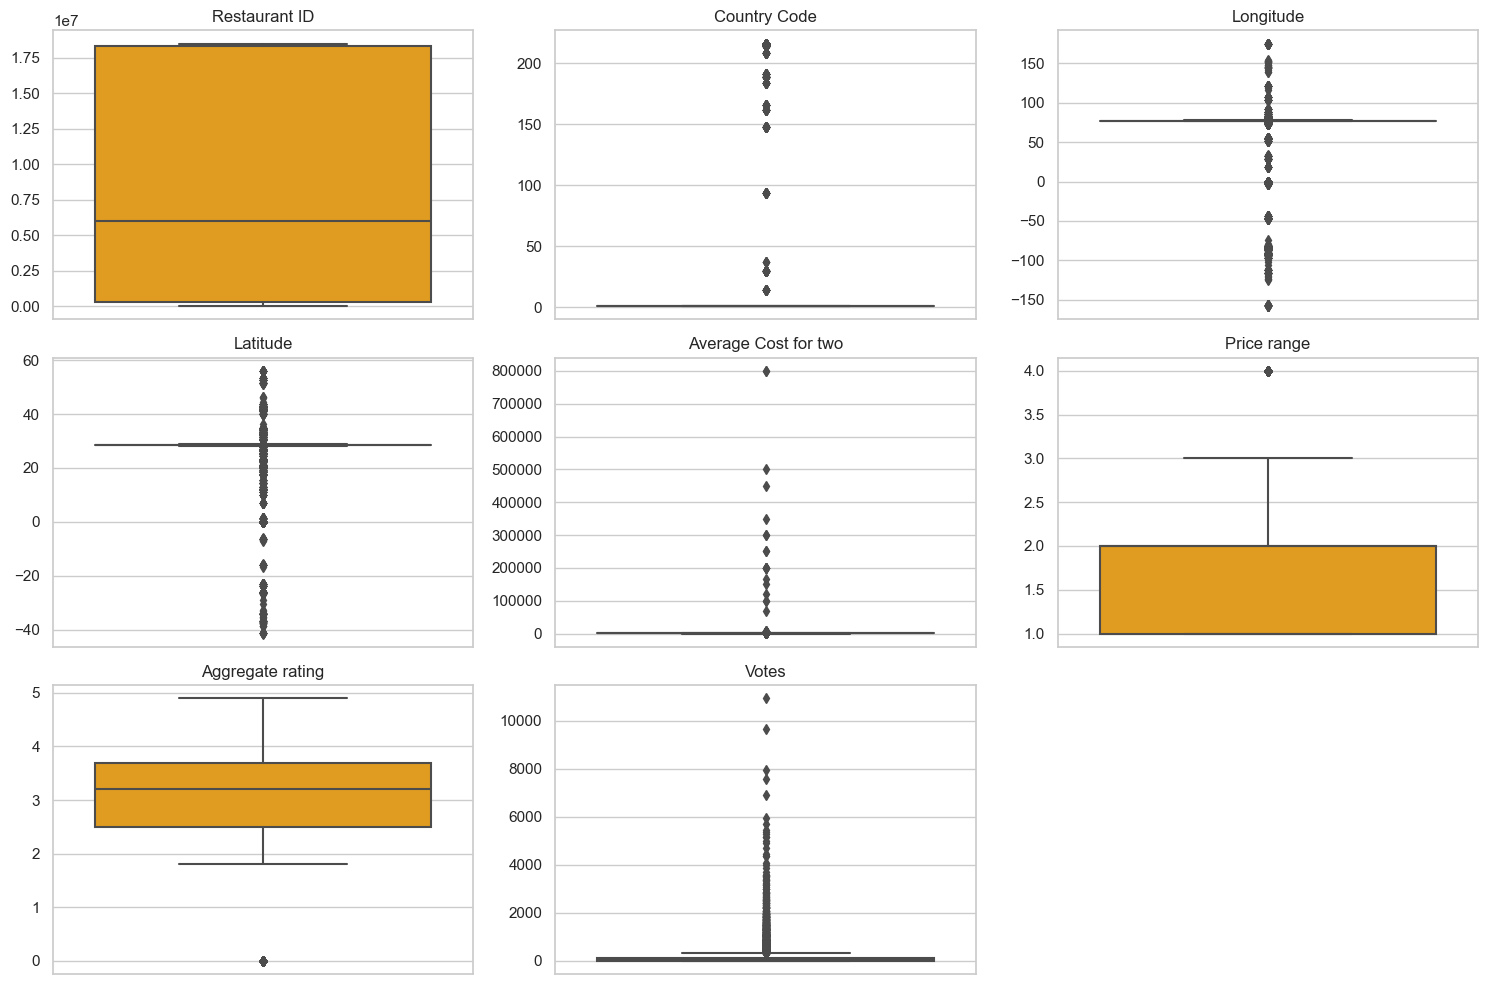

In [62]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid of subplots
    sns.boxplot(y=df[column], orient='vertical', color='orange')
    plt.title(column, fontsize=12)
    plt.xlabel('')
    plt.ylabel('')
    
plt.tight_layout()
plt.show()

In [63]:
df.drop(columns=['Restaurant ID','Locality Verbose'],axis=1,inplace=True)


In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[df.columns[df.dtypes == 'object']]:
    df[col] = le.fit_transform(df[col])


In [65]:
df.head(5)

,Restaurant Name,Country Code,City,Address,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3749,162,73,8685,171,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314
1,3173,162,73,6055,593,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591
2,2897,162,75,4684,308,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270
3,4707,162,75,8690,862,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365
4,5523,162,75,8689,862,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229


# Correlation

In [66]:
df.corr()['Average Cost for two'].sort_values()


Latitude               -0.111088
Rating color           -0.049970
City                   -0.028838
Has Online delivery    -0.018974
Locality               -0.012136
Is delivering now      -0.001862
Cuisines                0.005755
Has Table booking       0.007758
Restaurant Name         0.019241
Address                 0.022749
Rating text             0.031439
Country Code            0.043225
Currency                0.045615
Longitude               0.045891
Aggregate rating        0.051792
Votes                   0.067783
Price range             0.075083
Average Cost for two    1.000000
Switch to order menu         NaN
Name: Average Cost for two, dtype: float64

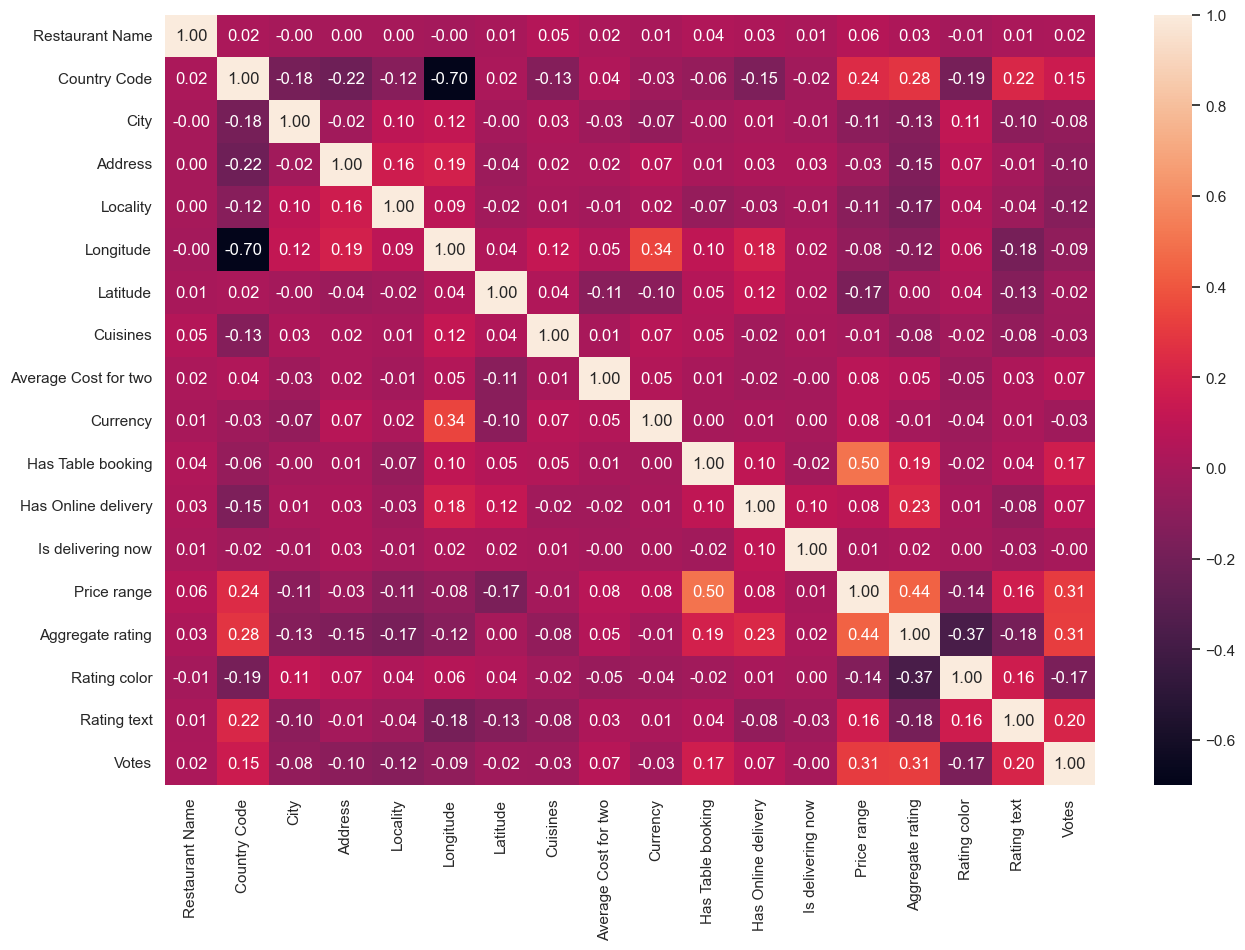

In [67]:
plt.figure(figsize=(15,10))
df = df.drop('Switch to order menu', axis=1)
sns.heatmap(df.corr(), annot=True, fmt ='.2f')
plt.show()

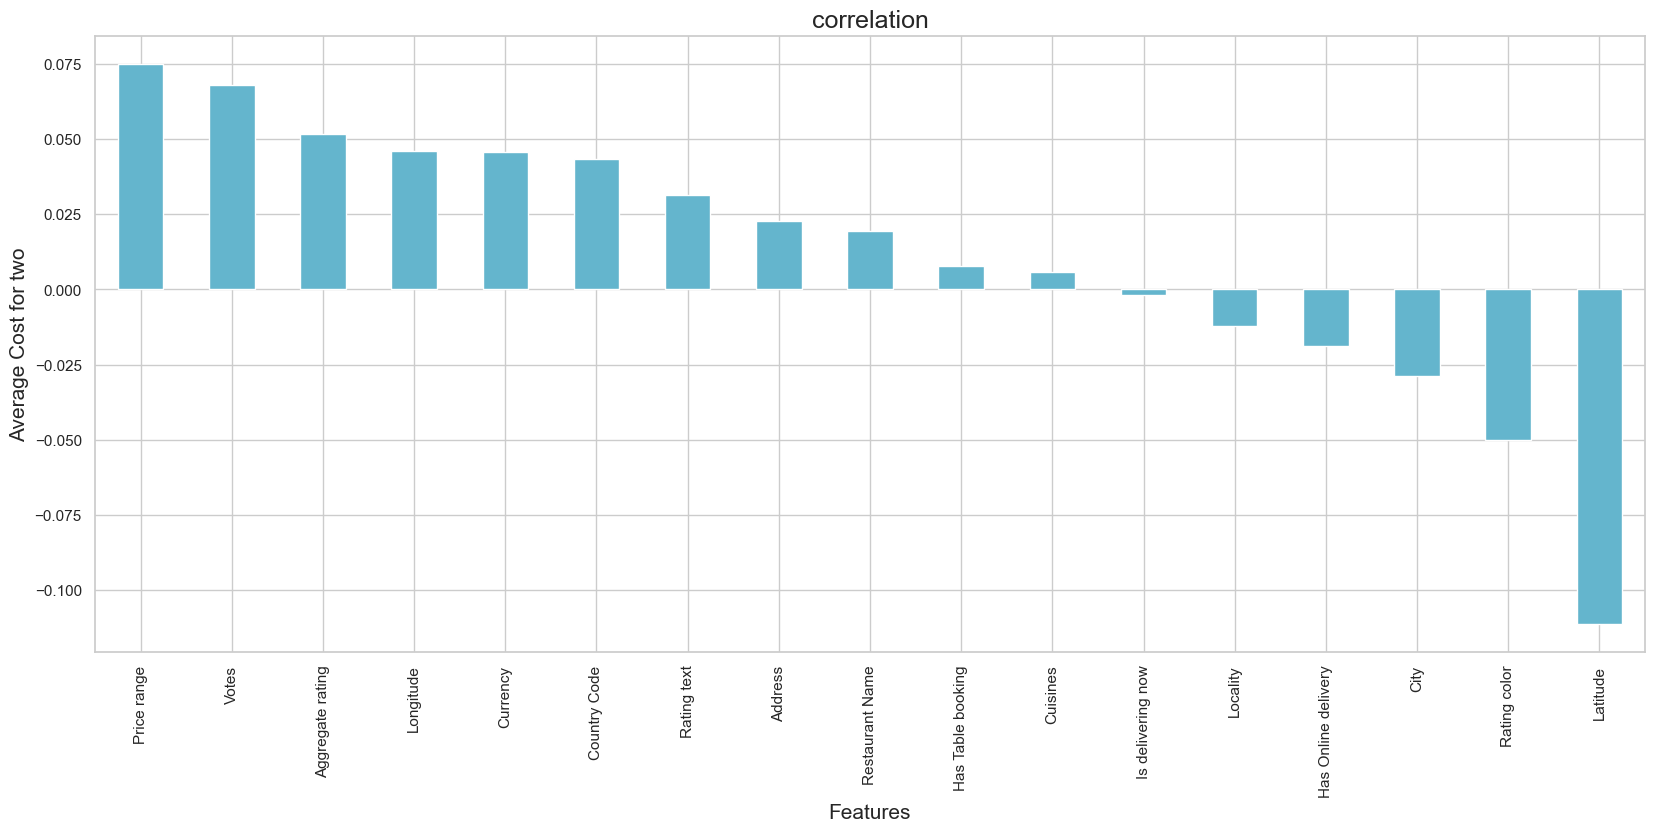

In [68]:
plt.figure(figsize = (20,8))
df.corr()['Average Cost for two'].sort_values(ascending = False).drop(['Average Cost for two']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Average Cost for two',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

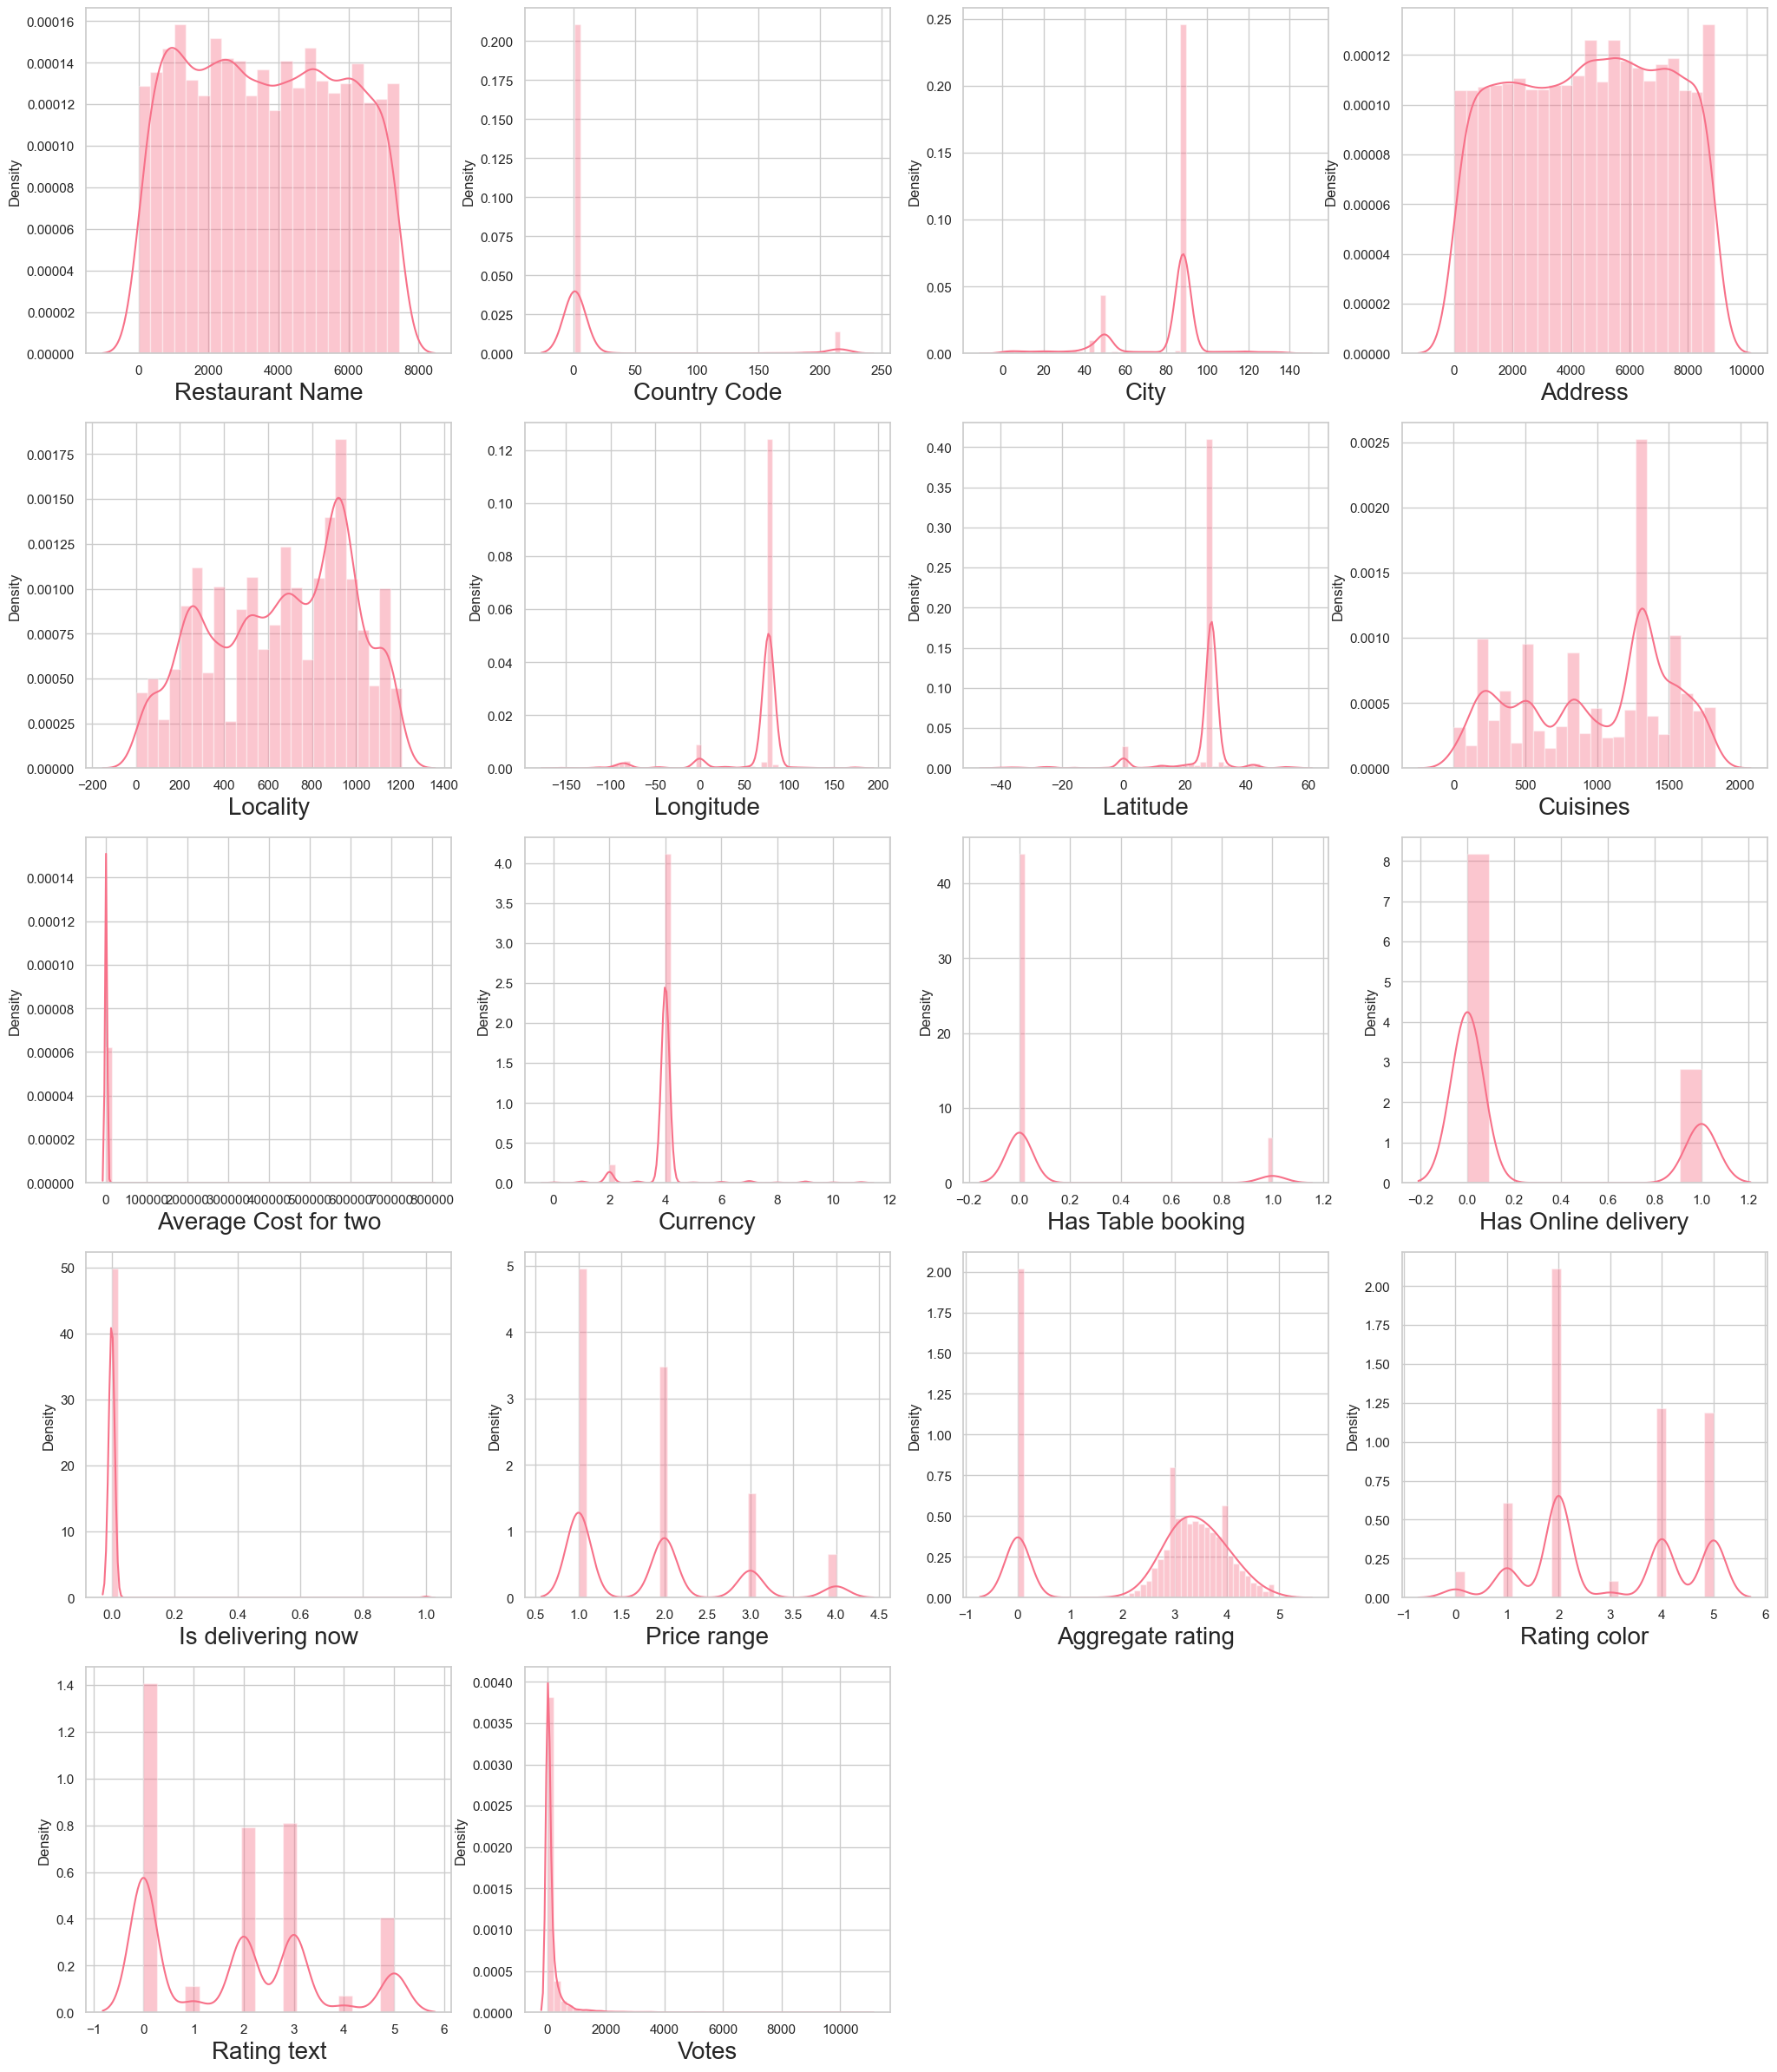

In [69]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
    if plotnumber <=20:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

# Skewness

In [70]:
df.skew()

Restaurant Name          0.044637
Country Code             3.043965
City                    -1.193777
Address                 -0.040407
Locality                -0.253554
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305484
Average Cost for two    35.477915
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    8.807637
dtype: float64

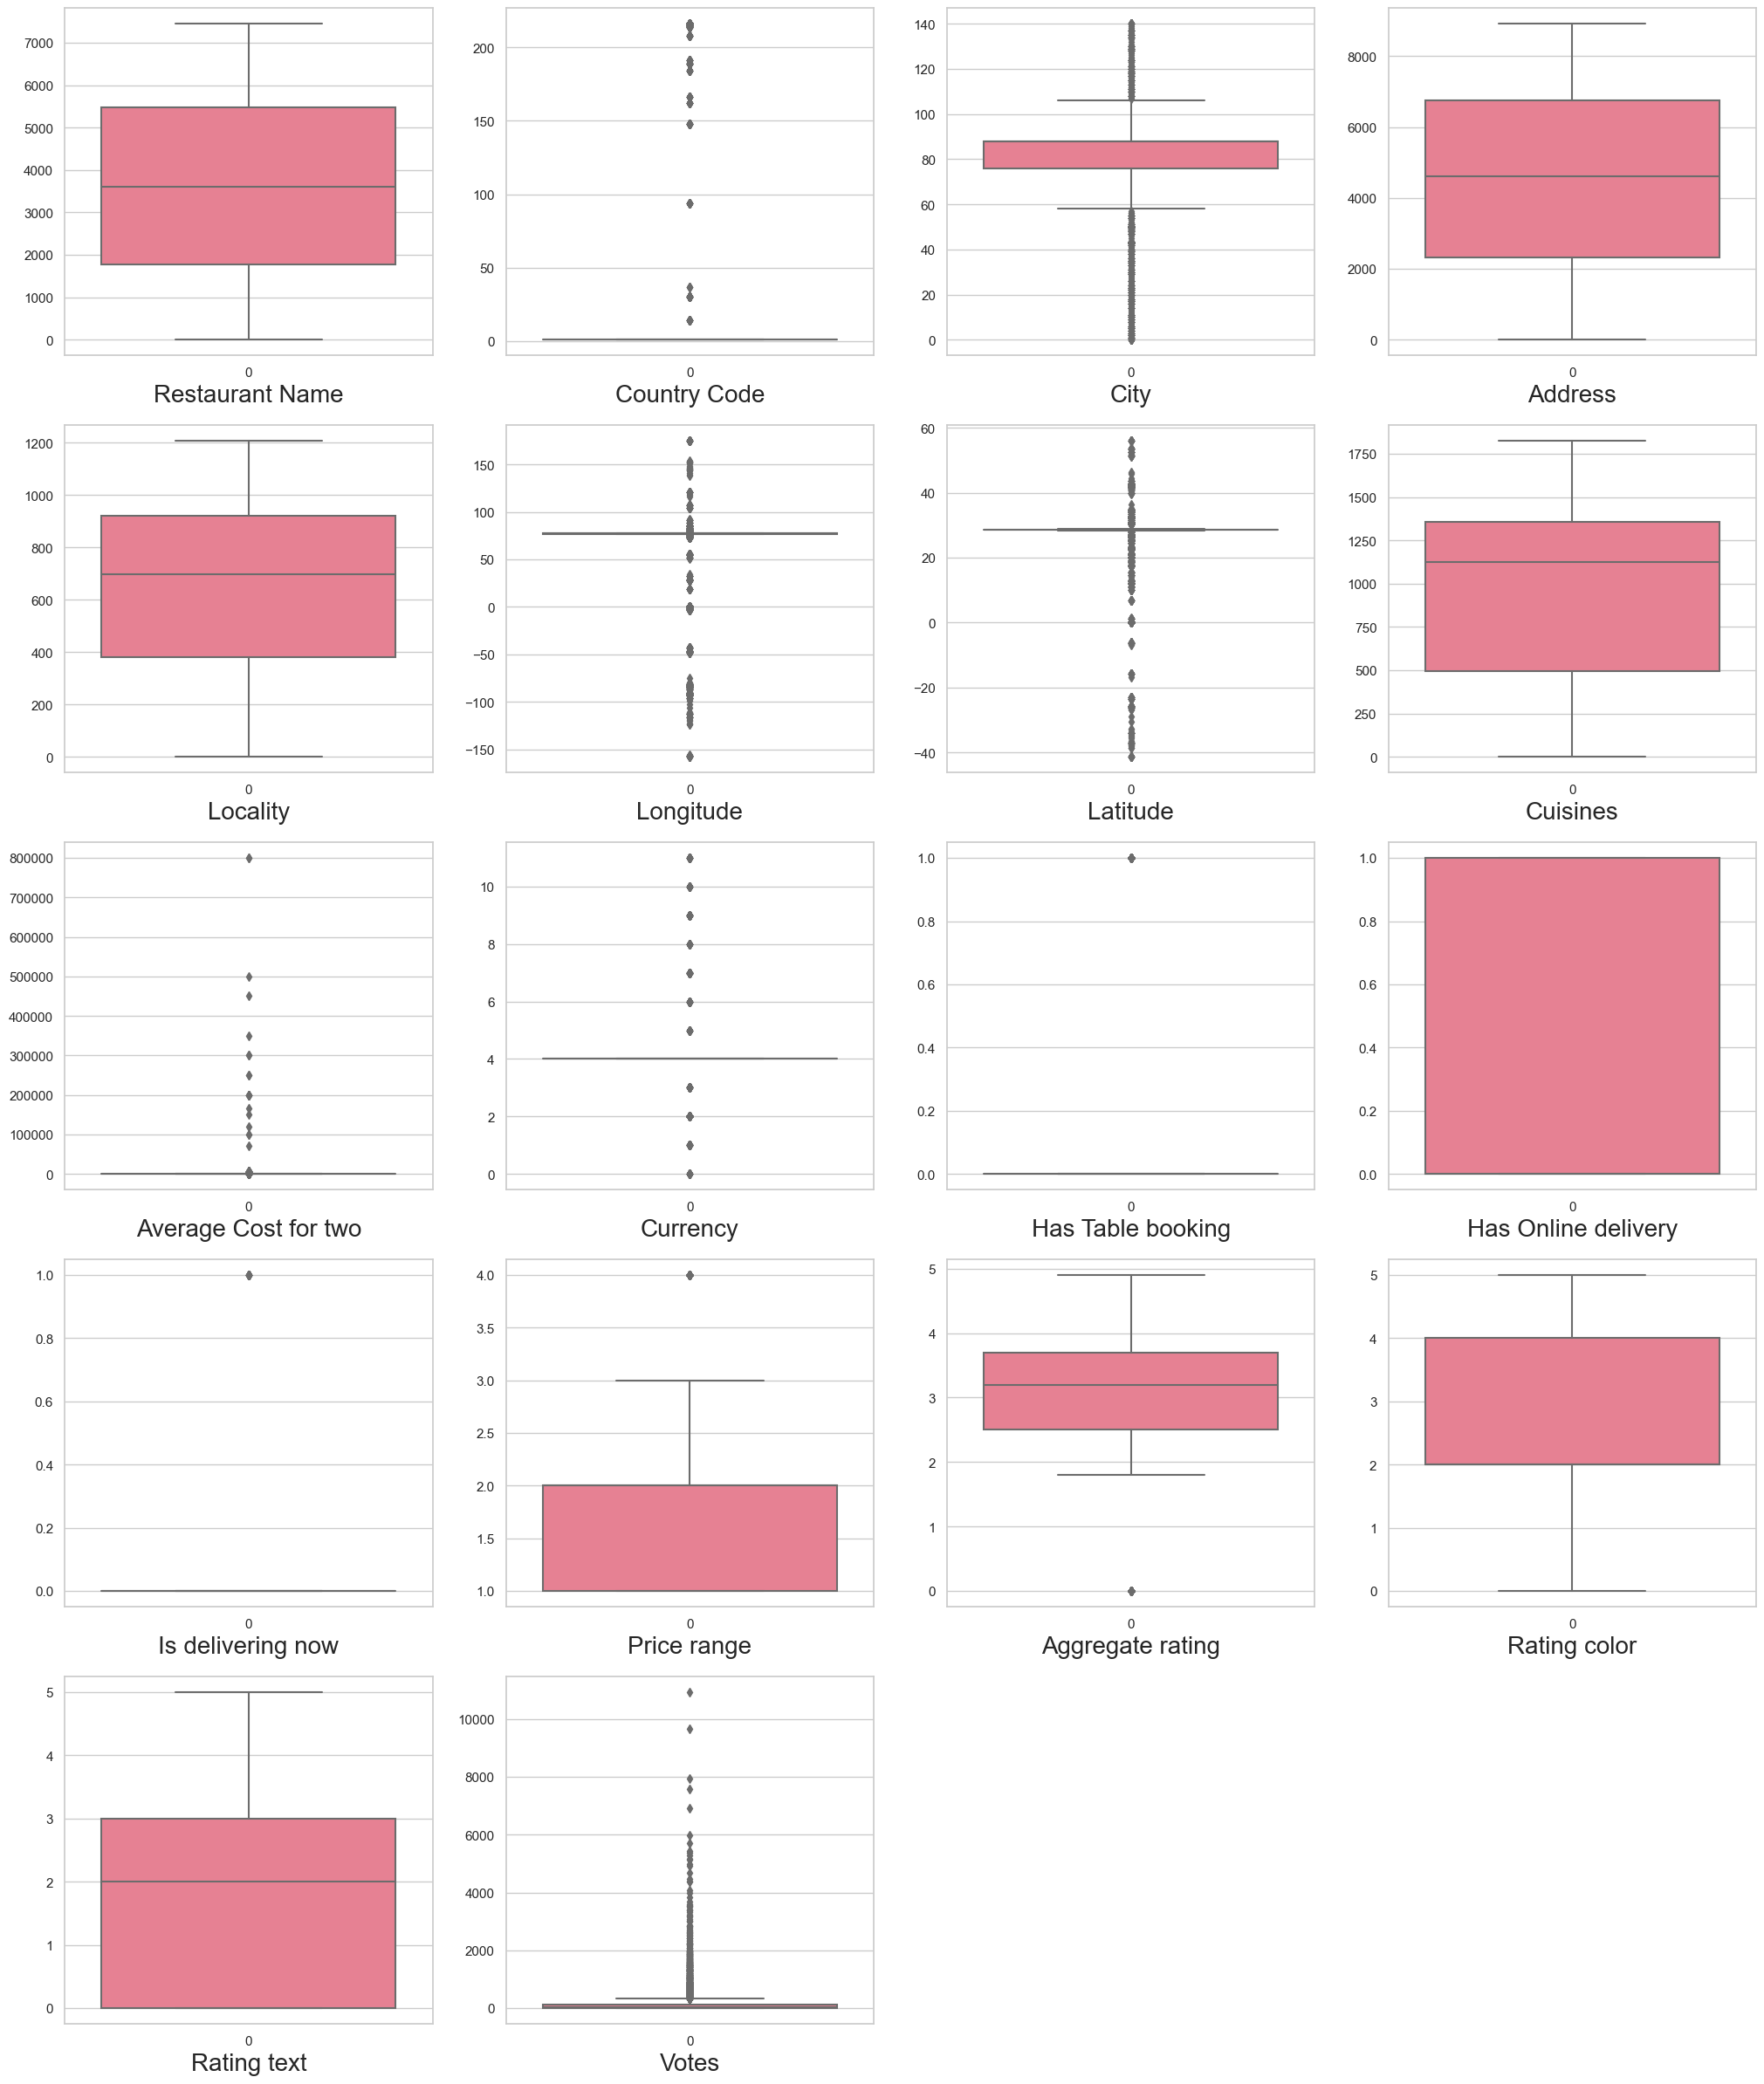

In [71]:
plt.figure(figsize=(25,30))
plotnumber = 1

for column in df:
    if plotnumber <=20:
        plt.subplot(5,4,plotnumber)
        ax = sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber +=1
plt.show()

# Outlier detection and Removal

In [72]:
from scipy.stats import zscore

z_score = zscore(df[['Average Cost for two','Votes']]) # Only removing outliers from continuous data
abs_z_score = np.abs(z_score)    # Apply the formula and get the scaled data

filtered_entry = (abs_z_score  < 3).all(axis=1)

df = df[filtered_entry]

# Checking Multicollinearity


In [73]:
x = df.drop(columns=['Average Cost for two'],axis=1)
y = df['Average Cost for two']

In [74]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_X = scaler.fit_transform(x)


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = x.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Restaurant Name,1.008695
1,Country Code,2.738298
2,City,1.077355
3,Address,1.099988
4,Locality,1.067096
5,Longitude,2.556426
6,Latitude,1.152967
7,Cuisines,1.043760
8,Currency,1.288302
9,Has Table booking,1.481057


In [76]:
x = df.drop(columns=['Average Cost for two'],axis=1)
y = df['Average Cost for two']

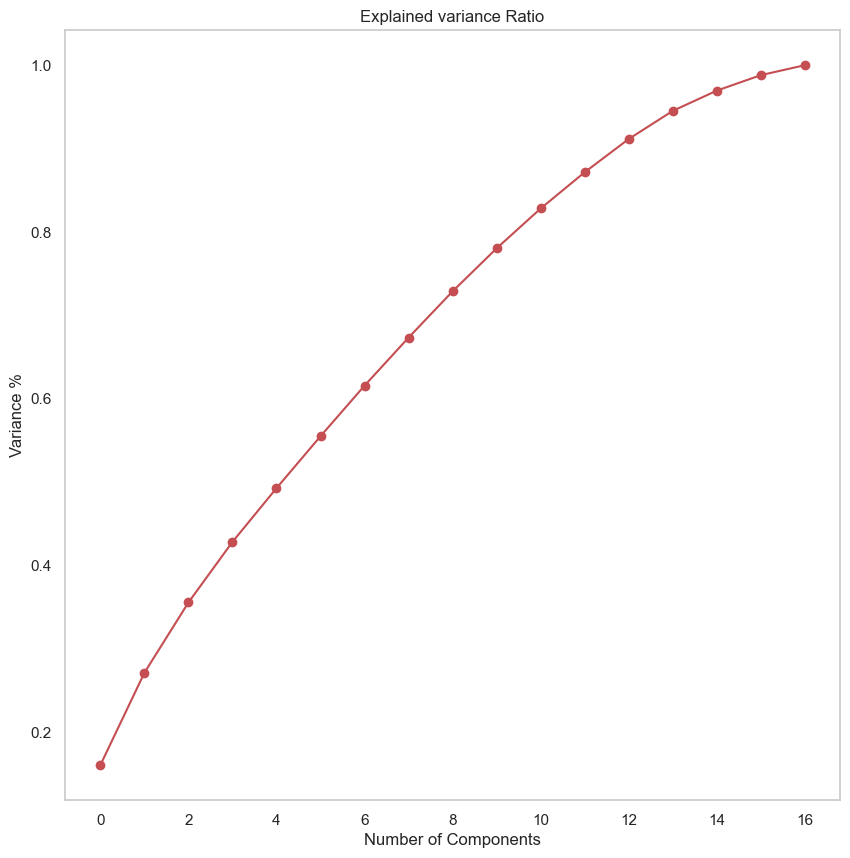

In [77]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(scaled_X)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [78]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(scaled_X)

In [79]:
p_x=pd.DataFrame(x_new,columns=np.arange(15))


# Model building

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [81]:
X_train, X_test, y_train, y_test = train_test_split(p_x, y, train_size=0.7, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)


(6553, 15)
(6553,)


In [82]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_train,y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',y_test)

Predicted Wins:
 [ 825.63967535 1999.94516371 1911.35533005 ...  231.36545707  934.76455728
  500.82893149]


Actual Wins:
 1844     700
4019    4500
6385    2200
6344     300
9099     200
        ... 
3459     300
3022    1200
3141     450
2395    1000
6557     500
Name: Average Cost for two, Length: 2809, dtype: int64


In [83]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 203.06327767783836
Mean squared error : 140458.4706392833
Root Mean Squared Error: 374.7778950782494


 R2 Score :
0.6152602184663905


In [84]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
KNN = KNeighborsRegressor()

gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,KNN,gradb,xgb]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
    print('Mean squared error :', mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    from sklearn.metrics import r2_score
    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(y_test,y_pred,multioutput='variance_weighted'))



 Error of  RandomForestRegressor() :
Mean absolute error : 141.95107155571378
Mean squared error : 77531.32360726237
Root Mean Squared Error: 278.4444713174646


 R2 Score :
0.7876284401296404


 Error of  ExtraTreesRegressor() :
Mean absolute error : 136.81813100747598
Mean squared error : 73495.64172698469
Root Mean Squared Error: 271.1007962492635


 R2 Score :
0.7986828632476644


 Error of  DecisionTreeRegressor() :
Mean absolute error : 191.87789248843004
Mean squared error : 178283.43716625133
Root Mean Squared Error: 422.236233838655


 R2 Score :
0.5116511638336139


 Error of  KNeighborsRegressor() :
Mean absolute error : 161.30124599501602
Mean squared error : 98983.85110715558
Root Mean Squared Error: 314.6169911291435


 R2 Score :
0.7288662970841764


 Error of  GradientBoostingRegressor() :
Mean absolute error : 158.07827571550143
Mean squared error : 86867.23489238616
Root Mean Squared Error: 294.73248021279596


 R2 Score :
0.7620557818776496


 Error of  XGBRegresso

# Cross Validation


In [85]:

from sklearn.model_selection import cross_val_score

model = [rf,XT,dtc,KNN,gradb,xgb]

for m in model:
    score = cross_val_score(m, scaled_X, y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.667959124786826


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7147423566226628


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.18705437830822821


Cross Validation Score : KNeighborsRegressor() :

Mean CV Score : 0.5171233157799808


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.6781629485570585


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, m

In [86]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create an Extra Trees Regressor model
Final_mod = ExtraTreesRegressor(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
Final_mod.fit(X_train, y_train)

# Make predictions on the test data
y_pred = Final_mod.predict(X_test)

# Calculate and print evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared Score:', r2)


Mean Absolute Error: 144.78259014672378
Mean Squared Error: 79140.31972080862
Root Mean Squared Error: 281.31889328804175
R-squared Score: 0.7832211244982179


In [135]:
import joblib
joblib.dump(Final_mod,'Average Cost for two.pkl')

['Average Cost for two.pkl']

# Prediction for Price Range

In [146]:
from scipy import stats
feature = df[['Longitude', 'Latitude', 'Average Cost for two','Aggregate rating', 'Votes']]

z = abs(stats.zscore(feature))
z

,Longitude,Latitude,Average Cost for two,Aggregate rating,Votes
0,1.372269,1.025581,0.006154,1.407131,0.365202
1,1.371945,1.026647,0.000049,1.209281,1.009168
2,1.372975,1.024131,0.173743,1.143331,0.262911
3,1.372966,1.023775,0.018659,1.473081,0.483766
4,1.372991,1.023854,0.018659,1.407131,0.167595
...,...,...,...,...,...
9546,0.847685,1.378025,0.069428,0.945480,1.467151
9547,0.846144,1.376849,0.067878,1.011430,2.039049
9548,0.846305,1.381025,0.063845,0.681680,1.171903
9549,0.846272,1.381221,0.066947,0.879530,1.729853


In [147]:
new_df = df[(z < 3).all(axis=1)]
new_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [148]:
new_df.skew()

Restaurant ID           0.133623
Country Code            5.692926
Longitude              -3.179687
Latitude               -2.246169
Average Cost for two    3.667387
Price range             0.987956
Aggregate rating       -0.887535
Votes                   3.555810
dtype: float64

In [150]:
new_df["Country Code"] = np.log1p(new_df["Country Code"])
new_df["Average Cost for two"] = np.log1p(new_df["Average Cost for two"])
new_df["Votes"] = np.log1p(new_df["Votes"])


In [151]:
new_df.skew().sort_values()


Average Cost for two   -3.868311
Longitude              -3.179687
Latitude               -2.246169
Aggregate rating       -0.887535
Votes                  -0.072096
Restaurant ID           0.133623
Price range             0.987956
Country Code            5.615065
dtype: float64

In [152]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
new_df[categorical_columns]= new_df[categorical_columns].apply(le.fit_transform)
new_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,3396,1.807264,34,7911,130,131,121.027535,14.565443,692,...,0,1,0,0,0,3,4.8,0,1,5.752573
1,6304287,2858,1.807264,34,5385,451,459,121.014101,14.553708,840,...,0,1,0,0,0,3,4.5,0,1,6.383507
2,6300002,2609,1.807264,36,4065,235,241,121.056831,14.581404,1351,...,0,1,0,0,0,4,4.4,1,5,5.602119
3,6318506,4250,1.807264,36,7916,649,662,121.056475,14.585318,851,...,0,0,0,0,0,4,4.9,0,1,5.902633
4,6314302,4997,1.807264,36,7915,649,662,121.057508,14.584450,850,...,0,1,0,0,0,4,4.8,0,1,5.438079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4003,1.847247,64,5260,395,401,28.977392,41.022793,1467,...,8,0,0,0,0,3,4.1,1,5,6.670766
9547,5908749,1189,1.847247,64,5294,423,429,29.041297,41.009847,1476,...,8,0,0,0,0,3,4.2,1,5,6.942157
9548,5915807,2759,1.847247,64,5298,425,432,29.034640,41.055817,839,...,8,0,0,0,0,4,3.7,5,2,6.495266
9549,5916112,476,1.847247,64,5299,425,432,29.036019,41.057979,1342,...,8,0,0,0,0,4,4.0,1,5,6.804615


In [153]:
new_df.corr()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
Restaurant ID,1.000000,0.001435,-0.010933,0.018369,0.144427,0.090965,0.091111,-0.135951,-0.141176,-0.058127,...,-0.030542,-0.087914,-0.057454,0.015051,NaN,-0.146514,-0.383038,0.153563,0.260709,-0.470073
Restaurant Name,0.001435,1.000000,0.021930,0.001480,0.003419,0.007021,0.007049,0.008666,0.016430,0.057685,...,0.011840,0.039287,0.030244,0.012731,NaN,0.067217,0.030887,-0.009391,0.010931,0.040938
Country Code,-0.010933,0.021930,1.000000,-0.172612,-0.047435,-0.079067,-0.077650,-0.236527,0.118865,-0.037371,...,0.429222,0.022893,-0.064458,-0.010791,NaN,0.264591,0.180106,-0.167081,0.132582,0.176072
City,0.018369,0.001480,-0.172612,1.000000,-0.073703,-0.013498,-0.017258,0.096054,0.012175,0.017744,...,-0.179236,-0.008279,-0.003063,-0.019945,NaN,-0.145719,-0.129306,0.098000,-0.083796,-0.123017
Address,0.144427,0.003419,-0.047435,-0.073703,1.000000,0.148533,0.150355,0.008873,-0.010663,-0.013820,...,-0.039459,-0.009390,-0.000654,0.029356,NaN,-0.021549,-0.104840,0.058493,0.043551,-0.128510
Locality,0.090965,0.007021,-0.079067,-0.013498,0.148533,1.000000,0.999162,-0.007993,-0.011999,-0.011836,...,-0.041923,-0.070233,-0.046986,-0.010331,NaN,-0.114817,-0.157253,0.018026,-0.008356,-0.187295
Locality Verbose,0.091111,0.007049,-0.077650,-0.017258,0.150355,0.999162,1.000000,-0.008872,-0.012487,-0.012912,...,-0.041409,-0.069349,-0.047377,-0.010310,NaN,-0.111872,-0.156218,0.018265,-0.006807,-0.185401
Longitude,-0.135951,0.008666,-0.236527,0.096054,0.008873,-0.007993,-0.008872,1.000000,0.609217,0.026592,...,-0.279751,0.064338,0.147549,0.016387,NaN,-0.012885,0.106891,-0.032743,-0.129577,0.122708
Latitude,-0.141176,0.016430,0.118865,0.012175,-0.010663,-0.011999,-0.012487,0.609217,1.000000,0.030685,...,0.214687,0.058207,0.128543,0.016572,NaN,-0.017057,0.105845,-0.070170,-0.119938,0.098207
Cuisines,-0.058127,0.057685,-0.037371,0.017744,-0.013820,-0.011836,-0.012912,0.026592,0.030685,1.000000,...,0.012402,0.040587,-0.038201,0.005417,NaN,0.010874,-0.050939,-0.039417,-0.060839,-0.035041


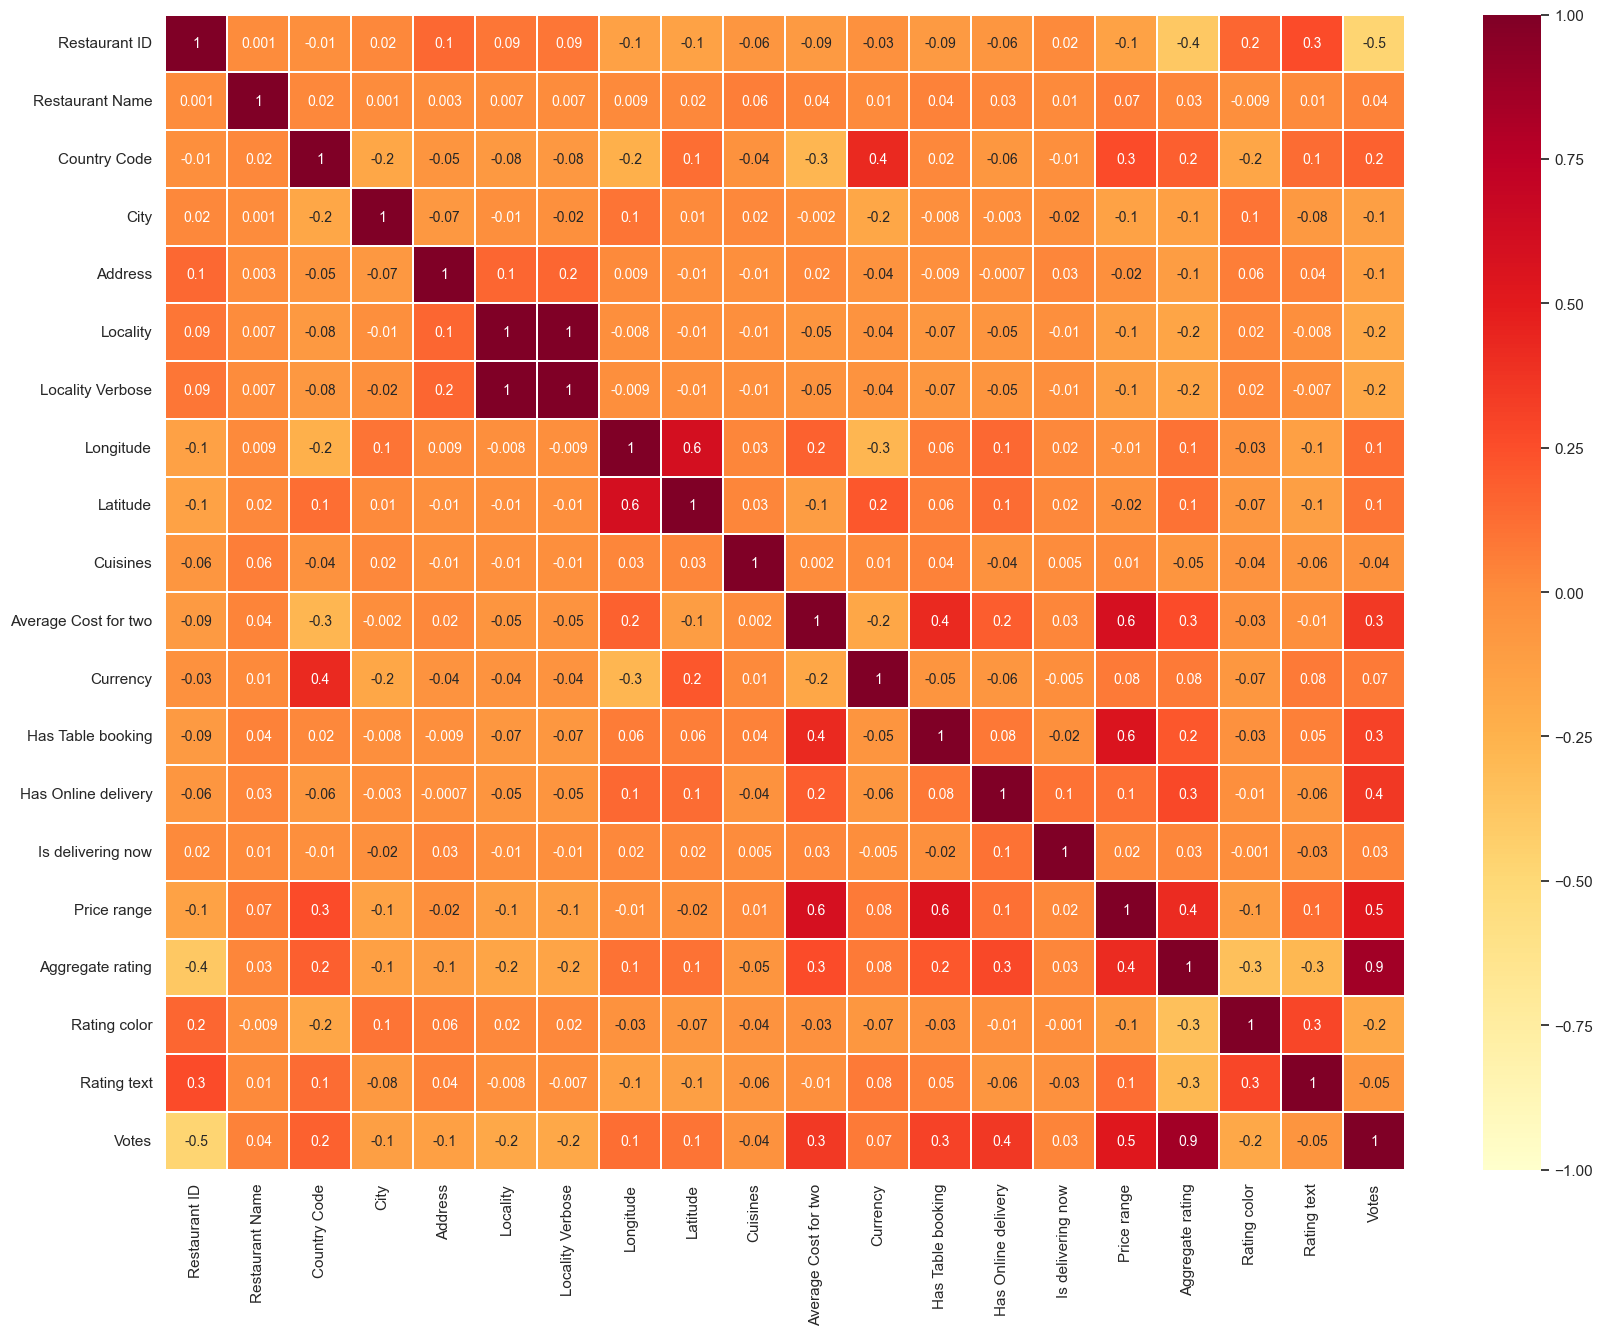

In [158]:
plt.figure(figsize=(20,15))    
new_df = new_df.drop('Switch to order menu', axis=1)
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="white",annot=True,annot_kws={'size':10},cmap="YlOrRd")
plt.yticks(rotation=0);

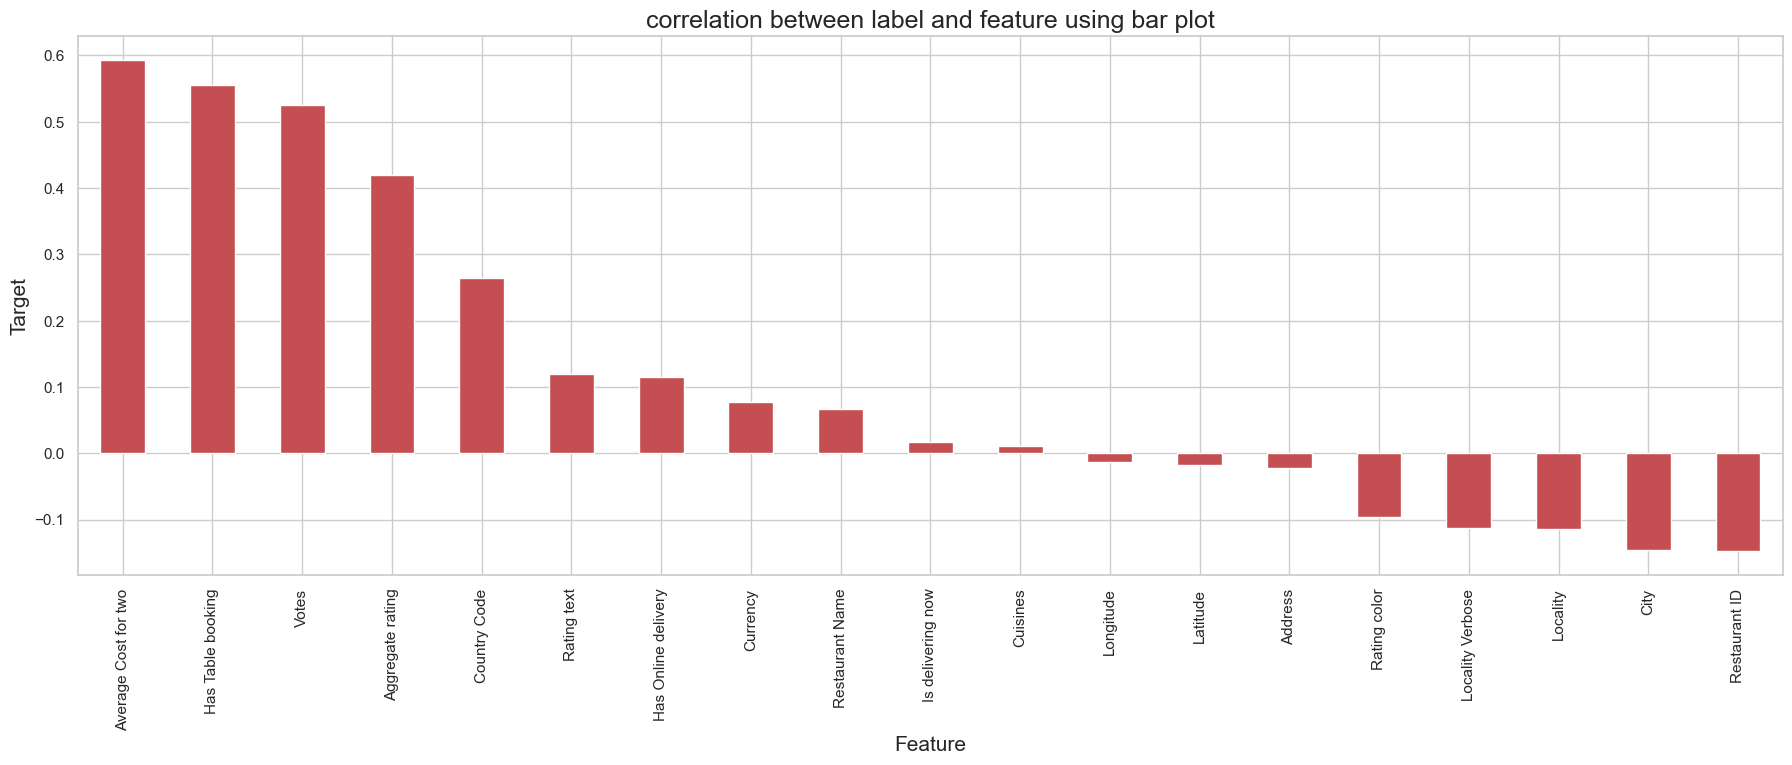

In [160]:
plt.figure(figsize=(22,7))
new_df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

In [161]:
x = new_df.drop("Price range", axis=1)
y = new_df["Price range"]

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes
0,-0.274832,0.048239,5.633157,-0.434411,1.609908,-1.601631,-1.573226,2.483309,-1.584974,-0.186045,0.991453,-6.358391,2.646442,-0.61343,-0.062435,1.492730,-2.139684,-0.410865,1.364656
1,-0.276336,-0.229343,5.633157,-0.434411,0.530432,-0.258385,-0.287252,2.482629,-1.586520,0.163002,1.074381,-6.358391,2.646442,-0.61343,-0.062435,1.294444,-2.139684,-0.410865,1.691110
2,-0.276819,-0.357814,5.633157,-0.238969,-0.033664,-1.162252,-1.141954,2.484792,-1.582872,1.368156,2.138788,-6.358391,2.646442,-0.61343,-0.062435,1.228348,-1.433526,2.038936,1.286809
3,-0.274734,0.488861,5.633157,-0.238969,1.612045,0.570159,0.508640,2.484774,-1.582357,0.188945,1.283071,-6.358391,-0.377866,-0.61343,-0.062435,1.558825,-2.139684,-0.410865,1.442300
4,-0.275208,0.874276,5.633157,-0.238969,1.611618,0.570159,0.508640,2.484827,-1.582471,0.186586,1.283071,-6.358391,2.646442,-0.61343,-0.062435,1.492730,-2.139684,-0.410865,1.201933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,-0.320114,0.361421,5.814422,2.497228,0.477014,-0.492721,-0.514650,-2.176778,1.899119,1.641733,-2.037399,10.400812,-0.377866,-0.61343,-0.062435,1.030063,-1.433526,2.038936,1.839742
8752,-0.320901,-1.090464,5.814422,2.497228,0.491544,-0.375553,-0.404872,-2.173543,1.897414,1.662959,-1.663860,10.400812,-0.377866,-0.61343,-0.062435,1.096158,-1.433526,2.038936,1.980163
8753,-0.320105,-0.280422,5.814422,2.497228,0.493253,-0.367184,-0.393110,-2.173880,1.903467,0.160643,-1.041579,10.400812,-0.377866,-0.61343,-0.062435,0.765682,1.391105,0.201585,1.748936
8754,-0.320071,-1.458337,5.814422,2.497228,0.493681,-0.367184,-0.393110,-2.173810,1.903752,1.346930,-1.486531,10.400812,-0.377866,-0.61343,-0.062435,0.963967,-1.433526,2.038936,1.908997


In [163]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF for each numeric column
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns

# Display the VIF values
print(vif)

           VIF              Features
0     1.534486         Restaurant ID
1     1.008361       Restaurant Name
2     1.571835          Country Code
3     1.094874                  City
4     1.062948               Address
5   606.203195              Locality
6   606.156025      Locality Verbose
7     2.514383             Longitude
8     2.443844              Latitude
9     1.028067              Cuisines
10    1.664603  Average Cost for two
11    1.631067              Currency
12    1.345798     Has Table booking
13    1.257635   Has Online delivery
14    1.015231     Is delivering now
15    5.352209      Aggregate rating
16    1.265712          Rating color
17    1.541029           Rating text
18    6.290185                 Votes


In [164]:
# Dropping Temp3pm column
x.drop("Locality",axis=1,inplace=True)

# Dropping Pressure9am column
x.drop("Locality Verbose",axis=1,inplace=True)

In [165]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["Features"] = x.columns

# Display the VIF values
print(vif)

         VIF              Features
0   1.534008         Restaurant ID
1   1.008083       Restaurant Name
2   1.568996          Country Code
3   1.086673                  City
4   1.044727               Address
5   2.513272             Longitude
6   2.442774              Latitude
7   1.027171              Cuisines
8   1.664429  Average Cost for two
9   1.630154              Currency
10  1.345325     Has Table booking
11  1.256530   Has Online delivery
12  1.015081     Is delivering now
13  5.348173      Aggregate rating
14  1.264911          Rating color
15  1.540712           Rating text
16  6.257009                 Votes


# Oversampling

In [167]:
y.value_counts()

1    4293
2    2880
3    1140
4     443
Name: Price range, dtype: int64

In [168]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [169]:
y.value_counts()

3    4293
4    4293
2    4293
1    4293
Name: Price range, dtype: int64

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

# Modelling

Logistic Regression Base Line Model

In [172]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

# Prediction
predlr = lr.predict(x_test)

print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test,predlr))

0.9015916149068323
[[1261   21    0    0]
 [  13 1240   56    6]
 [   1   72 1077  129]
 [   0    0  209 1067]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      1282
           2       0.93      0.94      0.94      1315
           3       0.80      0.84      0.82      1279
           4       0.89      0.84      0.86      1276

    accuracy                           0.90      5152
   macro avg       0.90      0.90      0.90      5152
weighted avg       0.90      0.90      0.90      5152



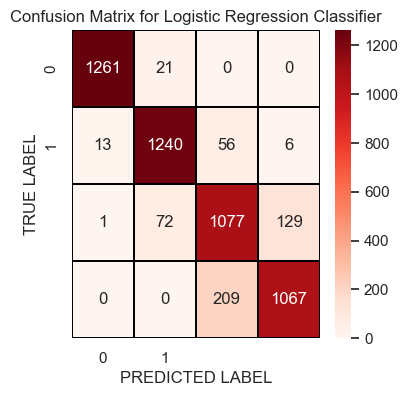

In [173]:
# Lets plot confusion matrix for Logistic Regression
cm = confusion_matrix(y_test,predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.1, linecolor="black", fmt = ".0f", ax=ax, cmap="Reds",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Random Forest Classifier


In [174]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9937888198757764
[[1276    6    0    0]
 [   6 1299   10    0]
 [   0    1 1275    3]
 [   0    0    6 1270]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1282
           2       0.99      0.99      0.99      1315
           3       0.99      1.00      0.99      1279
           4       1.00      1.00      1.00      1276

    accuracy                           0.99      5152
   macro avg       0.99      0.99      0.99      5152
weighted avg       0.99      0.99      0.99      5152



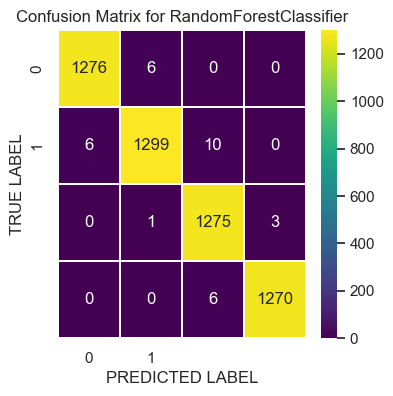

In [175]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="viridis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# AdaBoost Classifier

In [176]:
# Checking accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

# Prediction
predabc = abc.predict(x_test)

print(accuracy_score(y_test, predabc))
print(confusion_matrix(y_test, predabc))
print(classification_report(y_test,predabc))

0.5419254658385093
[[1282    0    0    0]
 [  18 1271    6   20]
 [   0 1144   26  109]
 [   0 1025   38  213]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1282
           2       0.37      0.97      0.53      1315
           3       0.37      0.02      0.04      1279
           4       0.62      0.17      0.26      1276

    accuracy                           0.54      5152
   macro avg       0.59      0.54      0.46      5152
weighted avg       0.59      0.54      0.46      5152



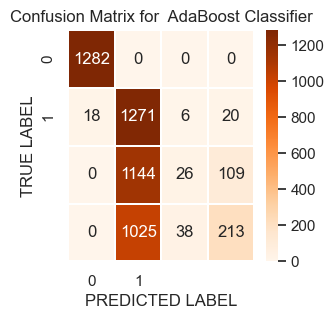

In [177]:
# Lets plot confusion matrix for  AdaBoost Classifier
cm = confusion_matrix(y_test,predabc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="Oranges",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  AdaBoost Classifier')
plt.show()

# Gradient Boosting Classifier

In [178]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.9833074534161491
[[1281    1    0    0]
 [   4 1294   15    2]
 [   0   21 1246   12]
 [   0    0   31 1245]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1282
           2       0.98      0.98      0.98      1315
           3       0.96      0.97      0.97      1279
           4       0.99      0.98      0.98      1276

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



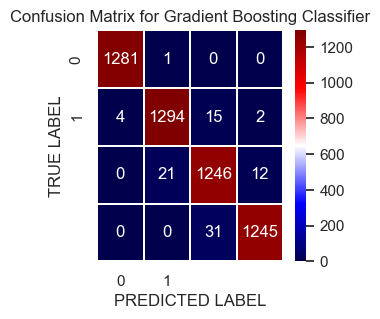

In [179]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="seismic",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Extra Trees Classifier

In [180]:
# Checking accuracy for ExtraTreesClassifier
xtc = ExtraTreesClassifier()
xtc.fit(x_train,y_train)

# Prediction
predxtc = xtc.predict(x_test)

print(accuracy_score(y_test, predxtc))
print(confusion_matrix(y_test, predxtc))
print(classification_report(y_test,predxtc))

0.9833074534161491
[[1261   21    0    0]
 [  10 1265   36    4]
 [   1    9 1268    1]
 [   0    0    4 1272]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99      1282
           2       0.98      0.96      0.97      1315
           3       0.97      0.99      0.98      1279
           4       1.00      1.00      1.00      1276

    accuracy                           0.98      5152
   macro avg       0.98      0.98      0.98      5152
weighted avg       0.98      0.98      0.98      5152



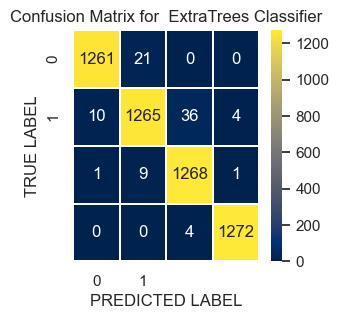

In [181]:
# Lets plot confusion matrix for  ExtraTreesClassifier
cm = confusion_matrix(y_test,predxtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="white", fmt = ".0f", ax=ax, cmap="cividis",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  ExtraTrees Classifier')
plt.show()

# XGB Classifier

In [182]:
# Checking accuracy for XGBClassifier
xgb = xgb(verbosity=0)
xgb.fit(x_train,y_train)

# Prediction
predxgb = xgb.predict(x_test)

print(accuracy_score(y_test, predxgb))
print(confusion_matrix(y_test, predxgb))
print(classification_report(y_test,predxgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3], got [1 2 3 4]

# Cross Validation Score

In [ ]:
# cv score for Logistic Regression
print('Logistic Regression:',cross_val_score(lr,x,y,cv=5).mean())

# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rf,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(abc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(xtc,x,y,cv=5).mean())

# HyperParameter Tuning of the best fit model

In [184]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the Grid Search to find the best hyperparameters
grid_search.fit(x, y)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best estimator (Random Forest Classifier)
best_rf_classifier = grid_search.best_estimator_

# Now, you can use the best_rf_classifier for predictions


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [185]:
# Create a Random Forest Classifier with specified hyperparameters
Price_Range = RandomForestClassifier(criterion='gini', max_depth=20, n_estimators=200, n_jobs=-2, random_state=1000)

# Fit the model on the training data
Price_Range.fit(x_train, y_train)

# Make predictions on the test data
pred = Price_Range.predict(x_test)

# Calculate the accuracy of the model's predictions
acc = accuracy_score(y_test, pred)

# Print the accuracy in percentage
print(acc * 100)


99.26242236024845


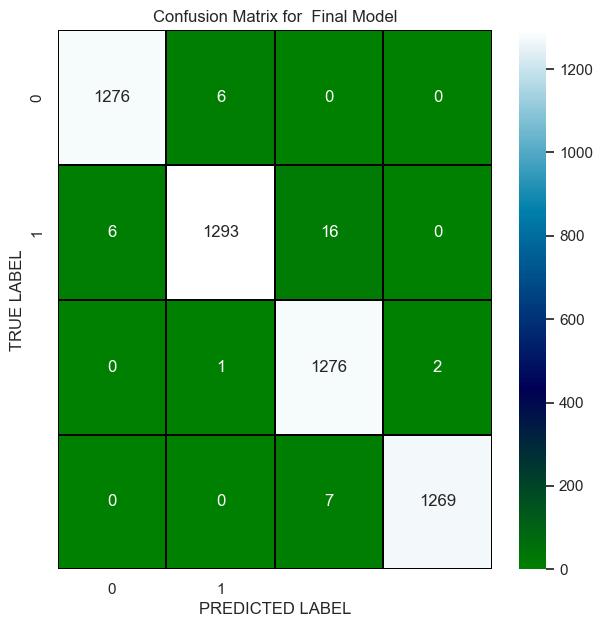

In [186]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

# Saving the Model

In [188]:
import joblib
joblib.dump(Price_Range,c)

['Prediction_of_Price_Range.pkl']

# Predicting the saved model

In [191]:
# Loading the saved model
model=joblib.load("Prediction_of_Price_range.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([4, 2, 3, ..., 1, 1, 3], dtype=int64)

In [192]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T


,Predicted,Original
0,4,4
1,2,2
2,3,3
3,4,4
4,4,4
...,...,...
5147,4,4
5148,3,3
5149,1,1
5150,1,1
